## Read the dataset

###Import the required libraries

In [ ]:
import pickle
import numpy as np
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, Dense, Dropout, Concatenate
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScalerac
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import load_model
import joblib
from keras import backend as K
!pip install np_utils
import np_utils
from sklearn.model_selection import KFold
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import csv
import os
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from keras.utils import to_categorical
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 935.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=9e1bb0e694a4e390d75e82b584a5318552d2e0b934f3f75a95d0cecfaf7ff595
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


### Connect to your google drive where DEAP dataset is extracted and stored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# you can change the following directory
directory = '/content/drive/MyDrive/Fear_level_classification/data_preprocessed_python'

###Preprocessing the data
<ol>
<li>Extracting only the required videos theat falls into the category of fear</li>

In [ ]:
def mean(numbers, i, j):
    sum=0
    for k in range(i, j):
        sum=sum+numbers[k]
    return float(sum / (j-i))

relaxation=[]
low_fear=[]
medium_fear=[]
high_fear=[]
averaged=[]
nr_relaxation=0
nr_low_fear=0
nr_medium_fear=0
nr_high_fear=0

In [ ]:
for j in range(1, 33):
    filename = 's' + str(j) + '.dat'
    filepath = os.path.join(directory, filename)
    with open(filepath, 'rb') as file:
      x = pickle.load(file, encoding='latin1')

      for i in range (0, 40):
          if x["labels"][i][0]>=7 and  x["labels"][i][0]<=9 and x["labels"][i][1]>=1 and  x["labels"][i][1]<3 and x["labels"][i][2]>=7 and  x["labels"][i][2]<=9:
              relaxation.append(x["data"][i])
              newrow = []
              for k in range (1, 8065):
                  newrow.append(0) #label for relaxation
              #This line appends the newrow to the data associated with the current relaxation trial.
              relaxation[nr_relaxation] = np.append(relaxation[nr_relaxation], [newrow], axis=0)
              limit1=0
              limit2=672
              while limit2<8065:
                  newrow=[]
                  for k in range (0, 41):
                     # Calculating the mean of the EEG data within each time window serves as a way to summarize the EEG activity over a specific duration of time.
                      newrow.append(mean(relaxation[nr_relaxation][k], limit1, limit2))
                  averaged.append(newrow)
                  limit1=limit1+672
                  limit2=limit2+672
              nr_relaxation=nr_relaxation+1

          if x["labels"][i][0]>=5 and  x["labels"][i][0]<7 and x["labels"][i][1]>=3 and  x["labels"][i][1]<5 and x["labels"][i][2]>=5 and  x["labels"][i][2]<7:
              #print(x["data"][i])
              low_fear.append(x["data"][i])
              newrow = []
              for k in range (1, 8065):
                  newrow.append(1)
              low_fear[nr_low_fear] = np.append(low_fear[nr_low_fear], [newrow], axis=0)
              limit1=0
              limit2=672
              while limit2<8065:
                  newrow=[]
                  for k in range (0, 41):
                      newrow.append(mean(low_fear[nr_low_fear][k], limit1, limit2))
                  averaged.append(newrow)
                  limit1=limit1+672
                  limit2=limit2+672
              nr_low_fear=nr_low_fear+1

          if x["labels"][i][0]>=3 and  x["labels"][i][0]<5 and x["labels"][i][1]>=5 and  x["labels"][i][1]<7 and x["labels"][i][2]>=3 and  x["labels"][i][2]<5:
              #print(x["data"][i])
              medium_fear.append(x["data"][i])
              newrow = []
              for k in range (1, 8065):
                  newrow.append(2)
              medium_fear[nr_medium_fear] = np.append(medium_fear[nr_medium_fear], [newrow], axis=0)
              limit1=0
              limit2=672
              while limit2<8065:
                  newrow=[]
                  for k in range (0, 41):
                      newrow.append(mean(medium_fear[nr_medium_fear][k], limit1, limit2))
                  averaged.append(newrow)
                  limit1=limit1+672
                  limit2=limit2+672
              nr_medium_fear=nr_medium_fear+1

          if x["labels"][i][0]>=1 and  x["labels"][i][0]<3 and x["labels"][i][1]>=7 and  x["labels"][i][1]<=9 and x["labels"][i][2]>=1 and  x["labels"][i][2]<3:
              #print(x["data"][i])
              high_fear.append(x["data"][i])
              newrow = []
              for k in range (1, 8065):
                  newrow.append(3)
              #print(newrow)
              high_fear[nr_high_fear] = np.append(high_fear[nr_high_fear], [newrow], axis=0)
              limit1=0
              limit2=672
              while limit2<8065:
                  newrow=[]
                  for k in range (0, 41):
                      newrow.append(mean(high_fear[nr_high_fear][k], limit1, limit2))
                  averaged.append(newrow)
                  limit1=limit1+672
                  limit2=limit2+672
              nr_high_fear=nr_high_fear+1


# this prints the selected number of videos for each feal levels
# the combined data is stored by downsampling the selected data.
print(nr_relaxation)
print(nr_low_fear)
print(nr_medium_fear)
print(nr_high_fear)


7
60
42
35


In [ ]:
relax = np.array(relaxation)
low = np.array(low_fear)
medium = np.array(medium_fear)
high = np.array(high_fear)
averaged = np.array(averaged)

In [ ]:
print(relax.shape)
print(low.shape)
print(medium.shape)
print(high.shape)
print(averaged.shape)

(7, 41, 8064)
(60, 41, 8064)
(42, 41, 8064)
(35, 41, 8064)
(1728, 41)


In [ ]:
x = np.array(averaged[:,:-1])
y = np.array(averaged[:,-1])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1382, 40)
(346, 40)
(1382,)
(346,)


##SNN model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpikingNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SpikingNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.hidden_size = hidden_size

        # Parameters for LIF neuron model
        self.tau_m = 20.0  # Membrane time constant in ms
        self.v_threshold = 1.0  # Spike threshold
        self.v_reset = 0.0  # Reset potential after spike

    def forward(self, x):
        # Initialize membrane potential and spike history
        v_mem = torch.zeros(x.size(0), self.hidden_size).to(x.device)
        spikes = []

        # Iterate over time steps (assuming x is shaped [batch_size, time_steps, input_size])
        for t in range(x.size(1)):
            # Calculate membrane potential using LIF dynamics
            v_mem += (-v_mem + F.relu(self.fc1(x[:, t]))) / self.tau_m

            # Check for spikes
            spike = (v_mem >= self.v_threshold).float()
            v_mem[spike.bool()] = self.v_reset  # Reset potential after spike

            spikes.append(spike)

        # Convert list of spikes to tensor and average over time steps
        spikes_tensor = torch.stack(spikes, dim=1)  # Shape: [batch_size, time_steps, hidden_size]

        # Pass through second layer and apply softmax activation for classification
        output = F.softmax(self.fc2(spikes_tensor.sum(dim=1)), dim=1)  # Sum spikes over time

        return output

In [ ]:
# Hyperparameters
input_size = 32   # Number of input features (e.g., EEG signals)
hidden_size = 64  # Number of neurons in hidden layer
output_size = 4   # Number of classes
num_epochs = 10   # Number of training epochs

# Instantiate the model and define optimizer and loss function.
model = SpikingNeuralNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


# Assuming X_train and y_train are numpy arrays
batch_size = 32
buffer_size = 1000  # Optional, for shuffling

# Convert numpy arrays to PyTorch tensors
# X_train = torch.from_numpy(X_train).float()
# y_train = torch.from_numpy(y_train).long()

# Create a dataset from the arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Shuffle the dataset and batch it
train_loader = train_dataset.shuffle(buffer_size).batch(batch_size)

# Optional: You can also prefetch to improve performance
train_loader = train_loader.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Example training loop (assuming train_loader is defined)
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)  # Forward pass through SNN

        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()             # Backward pass
        optimizer.step()            # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the model with dropout
class SparseNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SparseNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)  # Dropout with probability 0.5
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Convert sparse input to dense if needed
        x = x.to_dense() if x.is_sparse else x
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Sample input parameters
input_size = 40  # Example input size (adjust as per your data)
hidden_size = 128       # Number of neurons in hidden layer
output_size = 4  # Number of output classes

# Initialize the model, loss function, and optimizer
model = SparseNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization

# Placeholder for your EEG data and labels
# eeg_data_flattened should be of shape (num_samples, input_size)
# labels should be of shape (num_samples,) with class labels
# # Assume eeg_data_flattened and labels are already available as tensors
# eeg_data_flattened = torch.randn(1000, input_size)  # Replace with actual data
# labels = torch.randint(0, output_size, (1000,))    # Replace with actual labels
eeg_data_flattened = torch.from_numpy(X_train).float()
labels = torch.from_numpy(y_train).long()

# Training loop parameters
num_epochs = 100
batch_size = 64

# Store the loss values for plotting
train_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Mini-batch training
    for i in range(0, eeg_data_flattened.shape[0], batch_size):
        # Get mini-batch inputs and targets
        inputs = eeg_data_flattened[i:i + batch_size]
        targets = labels[i:i + batch_size]

        # Convert inputs to sparse tensors
        inputs_sparse = inputs.to_sparse()

        # Forward pass
        outputs = model(inputs_sparse)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        # Accumulate the loss for this mini-batch
        running_loss += loss.item() * inputs.size(0)

    # Compute average loss for this epoch
    avg_loss = running_loss / eeg_data_flattened.shape[0]
    train_losses.append(avg_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Plot the training loss curve
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Assuming test data and test labels are available as tensors
# Replace `test_data_flattened` and `test_labels` with actual test data and labels
test_data_flattened = torch.from_numpy(X_train).float()
test_labels = torch.from_numpy(y_train).long()

# Switch model to evaluation mode
model.eval()

# Placeholder to store model predictions
all_preds = []

# No gradient calculation needed during inference
with torch.no_grad():
    for i in range(0, test_data_flattened.shape[0], batch_size):
        inputs = test_data_flattened[i:i + batch_size]

        # Convert inputs to sparse tensors if necessary
        inputs_sparse = inputs.to_sparse()

        # Forward pass (prediction)
        outputs = model(inputs_sparse)

        # Get predicted class (argmax over the output probabilities)
        _, predicted_classes = torch.max(outputs, 1)

        # Collect predictions
        all_preds.append(predicted_classes)

# Concatenate all predictions into a single tensor
all_preds = torch.cat(all_preds)

# Convert tensors to numpy arrays for metric computation
y_true = test_labels.numpy()
y_pred = all_preds.numpy()

# Calculate accuracy, F1-score, confusion matrix, and classification report
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


## Knowledge distillation

<p>what if we train the model only with the 8 physiological signals with true ground labels will it give better result? So we will train the light weight student model with and without Knowledge Distillation</p>

### Simple neural network model
Using 40 channels for both the teacher model and the student model

<p>Teacher Model accuracy: 51</p>
<p>Student Model accuracy: 53</p>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, metrics

# Define the Teacher model
teacher_model = models.Sequential([
    layers.Input(shape=(40,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the Teacher model
teacher_model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)


In [ ]:
# Train the Teacher model
teacher_history = teacher_model.fit(X_train, y_train, epochs=35, validation_data=(X_test, y_test))


In [ ]:
# Freeze the Teacher model
teacher_model.trainable = False

# Define the Student model
student_model = models.Sequential([
    layers.Input(shape=(40,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Knowledge distillation loss
def distillation_loss(y_true, y_pred, teacher_pred, alpha=0.1, temperature=3):
    student_loss = losses.sparse_categorical_crossentropy(y_true, y_pred)
    distillation_loss = losses.KLDivergence()(
        tf.nn.softmax(teacher_pred / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * student_loss + (1 - alpha) * distillation_loss


In [ ]:
# Define a custom training step for the Student model
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher

    def compile(self, optimizer, metrics, alpha=0.1, temperature=3):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.alpha = alpha
        self.temperature = temperature
        self.student_loss = losses.SparseCategoricalCrossentropy()

    def train_step(self, data):
        x, y = data

        teacher_pred = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_pred = self.student(x, training=True)
            loss = distillation_loss(y, student_pred, teacher_pred, self.alpha, self.temperature)

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        self.compiled_metrics.update_state(y, student_pred)

        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data

        y_pred = self.student(x, training=False)
        loss = self.student_loss(y, y_pred)

        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Compile the Student model with distillation
distillation_model = DistillationModel(student_model, teacher_model)
distillation_model.compile(
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()],
    alpha=0.1,
    temperature=3
)

In [ ]:
print(teacher_model.summary())
print(student_model.summary())
print(distillation_model.summary())

In [ ]:

# Train the Student model
student_history= distillation_model.fit(X_train, y_train, epochs=35, validation_data=(X_test, y_test))

# Evaluate the Student model
distillation_model.evaluate(X_test, y_test)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting function for training and validation loss
def plot_loss(teacher_history, student_history):
    # Extract loss from the training history
    teacher_loss = teacher_history.history['loss']
    teacher_val_loss = teacher_history.history['val_loss']
    student_loss = student_history.history['loss']
    student_val_loss = student_history.history['val_loss']

    # Define number of epochs
    epochs_range = range(len(teacher_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(epochs_range, teacher_loss, label='Teacher Training Loss', color='blue')
    plt.plot(epochs_range, teacher_val_loss, label='Teacher Validation Loss', color='blue', linestyle='dashed')

    # Plot student model loss
    plt.plot(epochs_range, student_loss, label='Student Training Loss', color='green')
    plt.plot(epochs_range, student_val_loss, label='Student Validation Loss', color='green', linestyle='dashed')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history)


In [ ]:
# Plotting function for training and validation accuracy
def plot_accuracy(teacher_history, student_history):
    # Extract accuracy from the training history
    teacher_accuracy = teacher_history.history['sparse_categorical_accuracy']
    teacher_val_accuracy = teacher_history.history['val_sparse_categorical_accuracy']
    student_accuracy = student_history.history['sparse_categorical_accuracy']
    student_val_accuracy = student_history.history['val_sparse_categorical_accuracy']

    # Define number of epochs
    epochs_range = range(len(teacher_accuracy))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model accuracy
    plt.plot(epochs_range, teacher_accuracy, label='Teacher Training Accuracy', color='blue')
    plt.plot(epochs_range, teacher_val_accuracy, label='Teacher Validation Accuracy', color='blue', linestyle='dashed')

    # Plot student model accuracy
    plt.plot(epochs_range, student_accuracy, label='Student Training Accuracy', color='green')
    plt.plot(epochs_range, student_val_accuracy, label='Student Validation Accuracy', color='green', linestyle='dashed')

    # Add labels and title
    plt.title('Epochs vs Accuracy for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_accuracy(teacher_history, student_history)


In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,044 (27.52 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,044 (27.52 KB)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,500 (9.77 KB)

 Trainable params: 2,500 (9.77 KB)

 Non-trainable params: 0 (0.00 B)

None


### Student with 8 physiological signals
Using simple neural netword model, where the teacher is trained with 40 input channels and the student model is trained with 8 physiological signals and knowledge is transfered from the teacher model


<p>Teacher Model accuracy: 56</p>
<p>Student Model Accuracy: 49.71, F1 Score: 47.87</p>
<p>Without KD student model performance:</p>
<p>Accuracy: 0.4538</p>
<p>F1 Score: 0.4588</p>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_teacher_model():
    model = keras.Sequential([
        layers.Input(shape=(40,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(4, activation='softmax')   # Output layer for four classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

teacher_model = create_teacher_model()

In [ ]:
teacher_history = teacher_model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
teacher_accuracy = teacher_model.evaluate(X_test, y_test)
print(f'Student Model Accuracy: {teacher_accuracy[1] * 100:.2f}%')

In [ ]:
def create_student_model():
    model = keras.Sequential([
        layers.Input(shape=(8,)),   # Only taking last 8 features for student model
        layers.Dense(32, activation='relu'),
        layers.Dense(4, activation='softmax')   # Output layer for four classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

student_model = create_student_model()

In [ ]:
# Training the light weight student model with soft targets from teacher model


# Get soft predictions from teacher (using temperature scaling)
def get_soft_labels(model, X):
    logits = model.predict(X)
    temperature = 3.0   # Temperature parameter for softening probabilities
    soft_labels = tf.nn.softmax(logits / temperature).numpy()
    return soft_labels

# Generate soft labels from teacher's predictions on training data (using first half of features)
soft_labels_train = get_soft_labels(teacher_model, X_train)

# Generate soft labels from teacher's predictions on test data (using last half of features)
soft_labels_test = get_soft_labels(teacher_model, X_test)

# Convert soft_labels_train to one-hot encoding
soft_labels_train_one_hot = tf.keras.utils.to_categorical(np.argmax(soft_labels_train, axis=1), num_classes=4)

# Update student model to use categorical crossentropy
student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the student model with one-hot encoded soft labels
student_model.fit(X_train[:, -8:], soft_labels_train_one_hot, epochs=100, batch_size=32)

# Convert soft_labels_train to one-hot encoding
soft_labels_test_one_hot = tf.keras.utils.to_categorical(np.argmax(soft_labels_test, axis=1), num_classes=4)

student_accuracy = student_model.evaluate(X_test[:, -8:], soft_labels_test_one_hot)
print(f'Student Model Evaluation Accuracy: {student_accuracy[1] * 100:.2f}%')

# Make predictions
y_pred = student_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,836 (18.89 KB)

 Trainable params: 4,836 (18.89 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 420 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Training the light weight student model with groung true labels (y_train)


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
def create_student_model():
    model = keras.Sequential([
        layers.Input(shape=(8,)),  # Only taking last 8 features for student model
        layers.Dense(32, activation='relu'),
        layers.Dense(4, activation='softmax')  # Output layer for four classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_student_model()
student_history = model.fit(X_train[:,-8:], y_train, epochs=50, batch_size=10, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting function for training and validation loss
def plot_loss(teacher_history, student_history):
    # Extract loss from the training history
    teacher_loss = teacher_history.history['loss']
    #teacher_val_loss = teacher_history.history['val_loss']
    student_loss = student_history.history['loss']
    #student_val_loss = student_history.history['val_loss']

    # Define the range for epochs
    teacher_epochs_range = range(len(teacher_loss))
    student_epochs_range = range(len(student_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(teacher_epochs_range, teacher_loss, label='Teacher Training Loss', color='blue')
    #plt.plot(teacher_epochs_range, teacher_val_loss, label='Teacher Validation Loss', color='blue', linestyle='dashed')

    # Plot student model loss
    plt.plot(student_epochs_range, student_loss, label='Student Training Loss', color='green')
    #plt.plot(student_epochs_range, student_val_loss, label='Student Validation Loss', color='green', linestyle='dashed')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history)


In [ ]:
# Plotting function for training and validation accuracy
def plot_accuracy(teacher_history, student_history):
    # Extract accuracy from the training history
    teacher_accuracy = teacher_history.history['accuracy']
    #teacher_val_accuracy = teacher_history.history['val_accuracy']
    student_accuracy = student_history.history['accuracy']
    #student_val_accuracy = student_history.history['val_accuracy']

    # Define the range for epochs
    teacher_epochs_range = range(len(teacher_accuracy))
    student_epochs_range = range(len(student_accuracy))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model accuracy
    plt.plot(teacher_epochs_range, teacher_accuracy, label='Teacher Training Accuracy', color='blue')
    #plt.plot(teacher_epochs_range, teacher_val_accuracy, label='Teacher Validation Accuracy', color='blue', linestyle='dashed')

    # Plot student model accuracy
    plt.plot(student_epochs_range, student_accuracy, label='Student Training Accuracy', color='green')
    #plt.plot(student_epochs_range, student_val_accuracy, label='Student Validation Accuracy', color='green', linestyle='dashed')

    # Add labels and title
    plt.title('Epochs vs Accuracy for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_accuracy(teacher_history, student_history)


### Using DNN 300 model

<p>Teacher Model: Accuracy: 69.36, F1 Score: 68.51</p>
<p>Student Model: Accuracy: 61.27, F1 Score: 60.37</p>
<p>Model trained with only 8 physiological signals:<br>Accuracy: 63.29
F1 Score: 62.68</p>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
def create_teacher_model():
    model = Sequential()
    model.add(Dense(300, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_student_model_dnn300():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(300, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Train Teacher Model
teacher_model = create_teacher_model()
teacher_history= teacher_model.fit(X_train, y_train_cat, epochs=100, batch_size=32)

# Generate soft targets from Teacher Model for Student Training
soft_targets = teacher_model.predict(X_train)


In [ ]:
# Make predictions
y_pred = teacher_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.6965
F1 Score: 0.6876
Confusion Matrix:
 [[  8   4   1   3]
 [  1 126   9  15]
 [  1  38  51  15]
 [  0  10   8  56]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.50      0.62        16
         1.0       0.71      0.83      0.77       151
         2.0       0.74      0.49      0.59       105
         3.0       0.63      0.76      0.69        74

    accuracy                           0.70       346
   macro avg       0.72      0.64      0.66       346
weighted avg       0.70      0.70      0.69       346



In [ ]:
# Train Student Model using soft targets from Teacher Model


student_model = create_student_model_dnn300()
student_history= student_model.fit(X_train[:, -8:], soft_targets, epochs=100, batch_size=32)

In [ ]:
# Evaluate Student Model on Test Data
test_soft_targets = teacher_model.predict(X_test)
student_loss_and_metrics = student_model.evaluate(X_test[:, -8:], test_soft_targets)
print(f"EVALUATION RESULT:\nStudent Model Loss: {student_loss_and_metrics[0]}, Accuracy: {student_loss_and_metrics[1]}")

# Make predictions
y_pred = student_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
# print(student_loss_and_metrics)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.8435 
EVALUATION RESULT:
Student Model Loss: 0.8838009834289551, Accuracy: 0.8439306616783142
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.6763
F1 Score: 0.6665
Confusion Matrix:
 [[  9   5   0   2]
 [  0 127  13  11]
 [  0  44  48  13]
 [  0  16   8  50]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.56      0.72        16
         1.0       0.66      0.84      0.74       151
         2.0       0.70      0.46      0.55       105
         3.0       0.66      0.68      0.67        74

    accuracy                           0.68       346
   macro avg       0.75      0.63      0.67       346
weighted avg       0.69      0.68      0.67       346



In [ ]:
teacher_model = create_teacher_model()
student_model = create_student_model_dnn300()

print(teacher_model.summary())
print(student_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 300)                 │          12,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,704 (1.43 MB)

 Trainable params: 374,704 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,804 (1.05 MB)

 Trainable params: 274,804 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Training the light weight student model with groung true labels (y_train)


temp_model = create_student_model_dnn300()
temp_history= temp_model.fit(X_train[:, -8:], y_train_cat, epochs=100, batch_size=32)

In [ ]:
# Make predictions
y_pred = temp_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the training loss for both Teacher and Student models
def plot_loss(teacher_history, student_history, temp_history):
    # Extract loss for each model
    teacher_loss = teacher_history.history['loss']
    student_loss = student_history.history['loss']
    temp_loss = temp_history.history['loss']

    # Define the range of epochs
    teacher_epochs = range(len(teacher_loss))
    student_epochs = range(len(student_loss))
    temp_epochs = range(len(temp_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(teacher_epochs, teacher_loss, label='Teacher Model Loss', color='blue')

    # Plot student model loss (trained with soft targets)
    plt.plot(student_epochs, student_loss, label='Student Model Loss (Soft Targets)', color='green')

    # Plot temp student model loss (trained directly with 8 physiological signals)
    plt.plot(temp_epochs, temp_loss, label='Student Model Loss (8 Signals)', color='red')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history, temp_history)


In [ ]:
import matplotlib.pyplot as plt

# Function to plot the training accuracy for both Teacher and Student models
def plot_accuracy(teacher_history, student_history, temp_history):
    # Extract accuracy for each model
    teacher_accuracy = teacher_history.history['accuracy']
    student_accuracy = student_history.history['accuracy']
    temp_accuracy = temp_history.history['accuracy']

    # Define the range of epochs
    teacher_epochs = range(len(teacher_accuracy))
    student_epochs = range(len(student_accuracy))
    temp_epochs = range(len(temp_accuracy))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model accuracy
    plt.plot(teacher_epochs, teacher_accuracy, label='Teacher Model Accuracy', color='blue')

    # Plot student model accuracy (trained with soft targets)
    plt.plot(student_epochs, student_accuracy, label='Student Model Accuracy (Soft Targets)', color='green')

    # Plot temp student model accuracy (trained directly with 8 physiological signals)
    plt.plot(temp_epochs, temp_accuracy, label='Student Model Accuracy (8 Signals)', color='red')

    # Add labels and title
    plt.title('Epochs vs Accuracy for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_accuracy(teacher_history, student_history, temp_history)


### DNN 300 with cross validation

Teacher Model: Accuracy: 75.43,
F1_score: 75.28

Student Model: Accuracy: 73.12,
F1_score: 72.95

without KD: Accuracy: 75.43,
F1 Score: 75.24

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np1
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
def create_teacher_model():
    model = Sequential()
    model.add(Dense(300, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_student_model_dnn300():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(300, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Teacher Model Cross-Validation with Confusion Matrix and Classification Report
teacher_accuracies = []
teacher_f1_scores = []

teacher_model = create_teacher_model()

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_cat[train_index], y_train_cat[val_index]

    # Create and train the teacher model
    teacher_history= teacher_model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate on the validation set
    val_preds = teacher_model.predict(X_val_fold)
    val_preds_classes = np.argmax(val_preds, axis=1)
    y_val_classes = np.argmax(y_val_fold, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_classes, val_preds_classes)
    f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')
    print(f"Fold {fold} Teacher Model")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

    teacher_accuracies.append(accuracy)
    teacher_f1_scores.append(f1)

    # Print confusion matrix and classification report for the current fold
    # print(f"Fold {fold} Teacher Model")
    # print("Confusion Matrix:")
    # print(confusion_matrix(y_val_classes, val_preds_classes))
    # print("Classification Report:")
    # print(classification_report(y_val_classes, val_preds_classes))

print(f"Teacher Model Cross-Validation Accuracy: {np.mean(teacher_accuracies):.2f} ± {np.std(teacher_accuracies):.2f}")
print(f"Teacher Model Cross-Validation F1 Score: {np.mean(teacher_f1_scores):.2f} ± {np.std(teacher_f1_scores):.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Fold 1 Teacher Model
Accuracy: 0.7003610108303249
F1 Score: 0.6976419464563985
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 2 Teacher Model
Accuracy: 0.7256317689530686
F1 Score: 0.7206563842560073
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 3 Teacher Model
Accuracy: 0.7282608695652174
F1 Score: 0.7287987696034681
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 4 Teacher Model
Accuracy: 0.782608695652174
F1 Score: 0.7781564809467689
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 5 Teacher Model
Accuracy: 0.782608695652174
F1 Score: 0.781337263266611
Teacher Model Cross-Validation Accuracy: 0.74 ± 0.03
Teacher Model Cross-Validation F1 Score: 0.74 ± 0.03


In [ ]:
val_preds = teacher_model.predict(X_test)
val_preds_classes = np.argmax(val_preds, axis=1)
y_val_classes = np.argmax(y_test_cat, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_val_classes, val_preds_classes)
f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')

# Print confusion matrix and classification report for the current fold
print(f"TEST RESULT:\nAccuracy: {accuracy}\nf1_score: {f1}")
print("Confusion Matrix:")
print(confusion_matrix(y_val_classes, val_preds_classes))
print("Classification Report:")
print(classification_report(y_val_classes, val_preds_classes))

In [ ]:
eeg_signals_train = X_train[:, :32]
phys_signals_train = X_train[:, 32:]
eeg_signals_test = X_test[:, :32]
phys_signals_test = X_test[:, 32:]

In [ ]:
#For DNN 300

import tensorflow as tf
from tensorflow.keras import losses, optimizers

def distill_teacher_to_student(teacher_model, student_model,X_train_fold, X_train_phys, y_train, temperature=3, alpha=0.5, epochs=10, batch_size=32):
    # Convert labels to categorical (soft labels not needed for distillation)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
    print("started")

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in range(0, len(X_train_phys), batch_size):
            # Get batch data
            X_batch = X_train_phys[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                # Get teacher model predictions (soft labels)
                teacher_logits = teacher_model([X_train_fold[i:i+batch_size]], training=False)
                teacher_probs = tf.nn.softmax(teacher_logits / temperature)
                # print("passed 1")

                # Get student model predictions
                student_logits = student_model(X_batch, training=True)
                student_probs = tf.nn.softmax(student_logits / temperature)
                # print( "passed 2")

                # Distillation loss (between soft targets from teacher and student)
                distillation_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(teacher_probs, student_probs)
                )
                # print("passed 3.1")

                # print(y_batch.shape)
                # print(y_batch)
                # print(student_logits)
                # # student_logits = to_categorical(student_logits)
                # print(student_logits.shape)

                # Hard target loss (between true labels and student outputs)
                hard_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(y_batch, student_logits)
                )
                # print("passed 3.2")

                # Combined loss
                loss = alpha * distillation_loss + (1 - alpha) * hard_loss
                # print("passed 3.3")

            # Compute gradients
            grads = tape.gradient(loss, student_model.trainable_weights)
            optimizers.Adam().apply_gradients(zip(grads, student_model.trainable_weights))
            # print("passed 4")

        print(f"Loss: {loss.numpy()}")



In [ ]:

student_model = create_student_model_dnn300()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the light weight student model with groung true labels (y_train) and with KD
# Caution!: both code are in this file, comment the respective thing to run the code, currently commented the KD section

# Student Model Cross-Validation with Confusion Matrix and Classification Report
student_accuracies = []
student_f1_scores = []

student_model = create_student_model_dnn300()

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_cat[train_index], y_train_cat[val_index]

    # # Train teacher model to generate soft targets with KD
    # teacher_model = create_teacher_model()
    # teacher_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    # soft_targets = teacher_model.predict(X_train_fold)

    # # Create and train the student model with KD
    # student_history= student_model.fit(X_train_fold[:, -8:], soft_targets, epochs=100, batch_size=32, verbose=0)

    # without KD
    student_history= student_model.fit(X_train_fold[:, -8:], y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate on the validation set
    val_preds = student_model.predict(X_val_fold[:, -8:])
    val_preds_classes = np.argmax(val_preds, axis=1)
    y_val_classes = np.argmax(y_val_fold, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_classes, val_preds_classes)
    f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')

    print(f"Fold {fold} Student Model")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

    student_accuracies.append(accuracy)
    student_f1_scores.append(f1)

    # Print confusion matrix and classification report for the current fold
    # print(f"Fold {fold} Student Model")
    # print("Confusion Matrix:")
    # print(confusion_matrix(y_val_classes, val_preds_classes))
    # print("Classification Report:")
    # print(classification_report(y_val_classes, val_preds_classes))

print(f"Student Model Cross-Validation Accuracy: {np.mean(student_accuracies):.2f} ± {np.std(student_accuracies):.2f}")
print(f"Student Model Cross-Validation F1 Score: {np.mean(student_f1_scores):.2f} ± {np.std(student_f1_scores):.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 1 Student Model
Accuracy: 0.7003610108303249
F1 Score: 0.6988412835800883
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 2 Student Model
Accuracy: 0.7148014440433214
F1 Score: 0.7130134034639867
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 3 Student Model
Accuracy: 0.7644927536231884
F1 Score: 0.7654689386606234
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 4 Student Model
Accuracy: 0.7789855072463768
F1 Score: 0.7764728106221955
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 5 Student Model
Accuracy: 0.7971014492753623
F1 Score: 0.7957090952998881
Student Model Cross-Validation Accuracy: 0.75 ± 0.04
Student Model Cross-Validation F1 Score: 0.75 ± 0.04


In [ ]:
# Evaluate Student Model on Test Data
# test_soft_targets = teacher_model.predict(X_test)
# student_loss_and_metrics = student_model.evaluate(X_test[:, -8:], test_soft_targets)
# print(f"EVALUATION RESULT:\nStudent Model Loss: {student_loss_and_metrics[0]}, Accuracy: {student_loss_and_metrics[1]}\n\n")

val_preds = student_model.predict(X_test[:, -8:])
val_preds_classes = np.argmax(val_preds, axis=1)
y_val_classes = np.argmax(y_test_cat, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_val_classes, val_preds_classes)
f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')

# Print confusion matrix and classification report for the current fold
print(f"TEST RESULT:\nAccuracy: {accuracy}\nf1_score: {f1}")
print("Confusion Matrix:")
print(confusion_matrix(y_val_classes, val_preds_classes))
print("Classification Report:")
print(classification_report(y_val_classes, val_preds_classes))

#student model with 8 with kd
# Accuracy: 0.7023121387283237
# f1_score: 0.6983952768813754

#student model with 8 and without kd
# Accuracy: 0.7341040462427746
# f1_score: 0.7338367890578626

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
TEST RESULT:
Accuracy: 0.7341040462427746
f1_score: 0.7338367890578626
Confusion Matrix:
[[ 10   3   1   2]
 [  6 118  23   4]
 [  2  23  68  12]
 [  0   8   8  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        16
           1       0.78      0.78      0.78       151
           2       0.68      0.65      0.66       105
           3       0.76      0.78      0.77        74

    accuracy                           0.73       346
   macro avg       0.69      0.71      0.70       346
weighted avg       0.73      0.73      0.73       346



In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 300)                 │          12,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,124,114 (4.29 MB)

 Trainable params: 374,704 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 749,410 (2.86 MB)

None


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 824,414 (3.14 MB)

 Trainable params: 274,804 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 549,610 (2.10 MB)

None


####Now trainig the student model with 40 channels

In [ ]:
def create_student_model_dnn300():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(300, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Training the light weight student model with groung true labels (y_train) and with KD
# Caution!: both code are in this file, comment the respective thing to run the code, currently commented the KD section

# Student Model Cross-Validation with Confusion Matrix and Classification Report with 40 channels
student_accuracies = []
student_f1_scores = []

student_model = create_student_model_dnn300()

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_cat[train_index], y_train_cat[val_index]

    # Train teacher model to generate soft targets
    # teacher_model = create_teacher_model()
    # teacher_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    # soft_targets = teacher_model.predict(X_train_fold)

    # Create and train the student model
    # student_history= student_model.fit(X_train_fold[:, -8:], soft_targets, epochs=100, batch_size=32, verbose=0)

    #without KD
    student_history= student_model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate on the validation set
    val_preds = student_model.predict(X_val_fold)
    val_preds_classes = np.argmax(val_preds, axis=1)
    y_val_classes = np.argmax(y_val_fold, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_classes, val_preds_classes)
    f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')

    print(f"Fold {fold} Student Model")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

    student_accuracies.append(accuracy)
    student_f1_scores.append(f1)

print(f"Student Model Cross-Validation Accuracy: {np.mean(student_accuracies):.2f} ± {np.std(student_accuracies):.2f}")
print(f"Student Model Cross-Validation F1 Score: {np.mean(student_f1_scores):.2f} ± {np.std(student_f1_scores):.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 1 Student Model
Accuracy: 0.6642599277978339
F1 Score: 0.655431892451553
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 2 Student Model
Accuracy: 0.7472924187725631
F1 Score: 0.7451344805986464
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 3 Student Model
Accuracy: 0.8043478260869565
F1 Score: 0.8039709211416837
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 4 Student Model
Accuracy: 0.7427536231884058
F1 Score: 0.7401561465811597
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 5 Student Model
Accuracy: 0.7898550724637681
F1 Score: 0.7881543613020399
Student Model Cross-Validation Accuracy: 0.75 ± 0.05
Student Model Cross-Validation F1 Score: 0.75 ± 0.05


In [ ]:
print(student_model.summary())

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (None, 300)                 │          12,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 853,214 (3.25 MB)

 Trainable params: 284,404 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 568,810 (2.17 MB)

None


In [ ]:
# Student Model Cross-Validation with Confusion Matrix and Classification Report "without Knowledge Distillation" - temp
student_accuracies = []
student_f1_scores = []
print("Student model without knowledge distillation\n\n")

temp_model = create_student_model_dnn300()

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_cat[train_index], y_train_cat[val_index]

    # Train teacher model to generate soft targets
    # teacher_model = create_teacher_model()
    # teacher_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    # soft_targets = teacher_model.predict(X_train_fold)

    # Create and train the student model
    temp_history= temp_model.fit(X_train_fold[:, -8:], y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate on the validation set
    val_preds = temp_model.predict(X_val_fold[:, -8:])
    val_preds_classes = np.argmax(val_preds, axis=1)
    y_val_classes = np.argmax(y_val_fold, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_classes, val_preds_classes)
    f1 = f1_score(y_val_classes, val_preds_classes, average='weighted')

    print(f"Fold {fold} Student Model")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

    student_accuracies.append(accuracy)
    student_f1_scores.append(f1)

    # Print confusion matrix and classification report for the current fold
    # print(f"Fold {fold} Student Model")
    # print("Confusion Matrix:")
    # print(confusion_matrix(y_val_classes, val_preds_classes))
    # print("Classification Report:")
    # print(classification_report(y_val_classes, val_preds_classes))

print(f"Student Model Cross-Validation Accuracy: {np.mean(student_accuracies):.2f} ± {np.std(student_accuracies):.2f}")
print(f"Student Model Cross-Validation F1 Score: {np.mean(student_f1_scores):.2f} ± {np.std(student_f1_scores):.2f}")

In [ ]:
# Make predictions
y_pred = temp_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

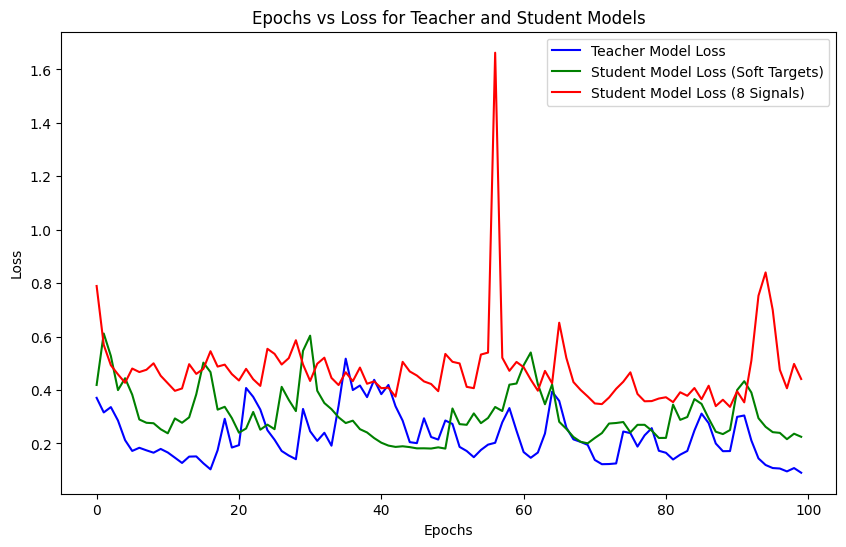

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the training loss for both Teacher and Student models
def plot_loss(teacher_history, student_history, temp_history):
    # Extract loss for each model
    teacher_loss = teacher_history.history['loss']
    student_loss = student_history.history['loss']
    temp_loss = temp_history.history['loss']

    # Define the range of epochs
    teacher_epochs = range(len(teacher_loss))
    student_epochs = range(len(student_loss))
    temp_epochs = range(len(temp_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(teacher_epochs, teacher_loss, label='Teacher Model Loss', color='blue')

    # Plot student model loss (trained with soft targets)
    plt.plot(student_epochs, student_loss, label='Student Model Loss (Soft Targets)', color='green')

    # Plot temp student model loss (trained directly with 8 physiological signals)
    plt.plot(temp_epochs, temp_loss, label='Student Model Loss (8 Signals)', color='red')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history, temp_history)


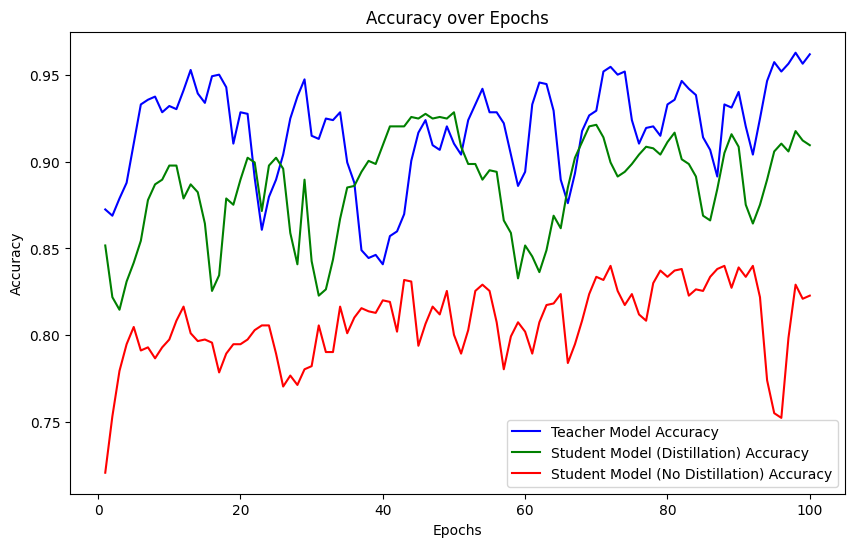

In [ ]:

# Function to plot accuracy over epochs
def plot_accuracy(teacher_history, student_history, temp_history):
    # Get accuracy from each model's history
    teacher_acc = teacher_history.history['accuracy']
    student_acc = student_history.history['accuracy']
    temp_acc = temp_history.history['accuracy']

    # Get the number of epochs
    epochs = range(1, len(teacher_acc) + 1)

    # Plot the accuracy over epochs for each model
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, teacher_acc, 'b-', label='Teacher Model Accuracy')
    plt.plot(epochs, student_acc, 'g-', label='Student Model (Distillation) Accuracy')
    plt.plot(epochs, temp_acc, 'r-', label='Student Model (No Distillation) Accuracy')

    # Add title and labels
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Assuming you have already captured the history objects:
# teacher_history, student_history, temp_history
plot_accuracy(teacher_history, student_history, temp_history)


### Using DNN 150 neurons

<p>Teacher Model: Accuracy: 69.94
F1 Score: 69.16</p>
<p>Student Model: Accuracy: 58.09
F1 Score: 57.36</p>
<p>Without KD: Accuracy: 67.63,
F1 Score: 67.50

In [ ]:
def create_teacher_model():
    model = Sequential()
    model.add(Dense(150, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_student_model():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(150, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Train Teacher Model
teacher_model_dnn150 = create_teacher_model()
teacher_history= teacher_model_dnn150.fit(X_train, y_train_cat, epochs=100, batch_size=32)

# Generate soft targets from Teacher Model for Student Training
soft_targets = teacher_model_dnn150.predict(X_train)


In [ ]:
# Make predictions
y_pred = teacher_model_dnn150.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

In [ ]:
# Train Student Model using soft targets from Teacher Model
student_model_dnn150 = create_student_model()
student_history= student_model_dnn150.fit(X_train[:, -8:], soft_targets, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3341 - loss: 57.7502
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4680 - loss: 18.9253
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4853 - loss: 13.4377
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 9.7041 
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5574 - loss: 7.6740
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5382 - loss: 9.7699 
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 7.6108
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 3.2077
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 2.9485
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 2.8759
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 3.2919
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [ ]:
# Evaluate Student Model on Test Data
test_soft_targets = teacher_model_dnn150.predict(X_test)
student_loss_and_metrics = student_model_dnn150.evaluate(X_test[:, -8:], test_soft_targets)
print(f"Student Model Loss: {student_loss_and_metrics[0]}, Accuracy: {student_loss_and_metrics[1]}")

# Make predictions
y_pred = student_model_dnn150.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7593 - loss: 1.1173  
Student Model Loss: 1.0656723976135254, Accuracy: 0.7543352842330933
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.6705
F1 Score: 0.6711
Confusion Matrix:
 [[ 11   5   0   0]
 [ 10 116  14  11]
 [  9  32  54  10]
 [  2  14   7  51]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.69      0.46        16
         1.0       0.69      0.77      0.73       151
         2.0       0.72      0.51      0.60       105
         3.0       0.71      0.69      0.70        74

    accuracy                           0.67       346
   macro avg       0.62      0.66      0.62       346
weighted avg       0.69      0.67      0.67       346



In [ ]:
teacher_model_dnn150 = create_teacher_model()
student_model_dnn150 = create_student_model()

print(teacher_model_dnn150.summary())
print(student_model_dnn150.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 150)                 │           6,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,054 (203.34 KB)

 Trainable params: 52,054 (203.34 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 150)                 │           1,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │             604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,604 (96.11 KB)

 Trainable params: 24,604 (96.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train Student Model without using soft targets from Teacher Model
temp_model = create_student_model()
temp_history= temp_model.fit(X_train[:, -8:], y_train_cat, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3329 - loss: 59.7954
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4207 - loss: 23.0099
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 14.5498
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4677 - loss: 23.2025
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4682 - loss: 28.9931
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4773 - loss: 18.4729
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5395 - loss: 8.4500
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 6.6615
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 4.7306
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5710 - loss: 4.9568
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 3.9264
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.600

In [ ]:
# Make predictions
y_pred = temp_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.6965
F1 Score: 0.6922
Confusion Matrix:
 [[  8   4   2   2]
 [  1 124  14  12]
 [  4  31  60  10]
 [  2  14   9  49]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.50      0.52        16
         1.0       0.72      0.82      0.77       151
         2.0       0.71      0.57      0.63       105
         3.0       0.67      0.66      0.67        74

    accuracy                           0.70       346
   macro avg       0.66      0.64      0.64       346
weighted avg       0.70      0.70      0.69       346



In [ ]:
import matplotlib.pyplot as plt

def plot_loss(teacher_history, student_history, temp_history):
    # Extract loss for each model
    teacher_loss = teacher_history.history['loss']
    student_loss = student_history.history['loss']
    temp_loss = temp_history.history['loss']

    # Define the range of epochs
    teacher_epochs = range(len(teacher_loss))
    student_epochs = range(len(student_loss))
    temp_epochs = range(len(temp_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(teacher_epochs, teacher_loss, label='Teacher Model Loss', color='blue')

    # Plot student model loss (trained with soft targets)
    plt.plot(student_epochs, student_loss, label='Student Model Loss (Soft Targets)', color='green')

    # Plot temp student model loss (trained directly with 8 physiological signals)
    plt.plot(temp_epochs, temp_loss, label='Student Model Loss (8 Signals)', color='red')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history, temp_history)



In [ ]:
# Function to plot accuracy over epochs
def plot_accuracy(teacher_history, student_history, temp_history):
    # Get accuracy from each model's history
    teacher_acc = teacher_history.history['accuracy']
    student_acc = student_history.history['accuracy']
    temp_acc = temp_history.history['accuracy']

    # Get the number of epochs
    epochs = range(1, len(teacher_acc) + 1)

    # Plot the accuracy over epochs for each model
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, teacher_acc, 'b-', label='Teacher Model Accuracy')
    plt.plot(epochs, student_acc, 'g-', label='Student Model (Distillation) Accuracy')
    plt.plot(epochs, temp_acc, 'r-', label='Student Model (No Distillation) Accuracy')

    # Add title and labels
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Assuming you have already captured the history objects:
# teacher_history, student_history, temp_history
plot_accuracy(teacher_history, student_history, temp_history)

### using LSTM model for knowledge distillation
<p>Teacher model: Accuracy: 51.16
F1 Score: 42.67</p>
<p>Student model: accuracy - 47.40, f1 score - 35.85</p>
<p>student model without KD: Accuracy - 47.69, F1-score - 39.04</p>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import KLDivergence

In [ ]:
# Splitting features for teacher and student models
X_teacher = X_train  # All features for teacher model (40 features)
X_student = X_train[:, -8:]  # Only last 8 features for student model (8 physiological signals)

y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [ ]:
def create_teacher_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))  # Output layer for four classes
    return model

teacher_model = create_teacher_model((X_teacher.shape[1], 1))
teacher_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Reshape input data for LSTM [samples, time steps, features]
X_teacher_reshaped = X_teacher.reshape((X_teacher.shape[0], X_teacher.shape[1], 1))

teacher_history= teacher_model.fit(X_teacher_reshaped, y_train_one_hot, epochs=100, batch_size=32)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2896 - loss: 1.5594
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3456 - loss: 1.3711
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3518 - loss: 1.3448
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3749 - loss: 1.3046
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4056 - loss: 1.2577
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3887 - loss: 1.2610
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3674 - loss: 1.2653
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4187 - loss: 1.2455
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4000 - loss: 1.2588
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4144 - loss: 1.2234
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3847 - loss: 1.2609
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

In [ ]:
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
y_pred = teacher_model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Accuracy: 0.4827
F1 Score: 0.3722
Confusion Matrix:
 [[  0  16   0   0]
 [  0 146   1   4]
 [  0  87   6  12]
 [  0  56   3  15]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.48      0.97      0.64       151
         2.0       0.60      0.06      0.10       105
         3.0       0.48      0.20      0.29        74

    accuracy                           0.48       346
   macro avg       0.39      0.31      0.26       346
weighted avg       0.49      0.48      0.37       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def create_student_model(input_shape):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    return model

student_model = create_student_model((X_student.shape[1], 1))
student_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Get soft labels from teacher's predictions
teacher_predictions = teacher_model.predict(X_teacher_reshaped)
soft_labels = tf.nn.softmax(teacher_predictions).numpy()

# Train student with soft labels and true labels combined (optional)
student_history= student_model.fit(X_student.reshape((X_student.shape[0], X_student.shape[1], 1)),
                  soft_labels,
                  epochs=100,
                  batch_size=32)

# Get soft labels from teacher's predictions
# teacher_predictions = teacher_model.evaluate(X_teacher.reshape((X_teacher.shape[0], X_teacher.shape[1], 1))) # Reshape X_teacher to match the expected input shape for the LSTM model
# soft_labels = tf.nn.softmax(teacher_predictions).numpy()

# # Train student with soft labels and true labels combined (optional)
# student_model.fit(X_student.reshape((X_student.shape[0], X_student.shape[1], 1)),
#                   soft_labels,
#                   epochs=50,
#                   batch_size=32)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8873 - loss: 1.6142
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 1.4576
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8403 - loss: 1.4239
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8519 - loss: 1.4101
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8289 - loss: 1.4024
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8569 - loss: 1.3961
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8529 - loss: 1.3926
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 1.3893
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 1.3872
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8437 - loss: 1.3866
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8490 - loss: 1.3850
Epoch 12/100
44/44 ━━━━━

In [ ]:
print(soft_labels)

[[0.20876965 0.28638878 0.25875688 0.24608468]
 [0.20773788 0.2891073  0.25944337 0.24371144]
 [0.18373758 0.1900123  0.21558523 0.41066483]
 ...
 [0.19995128 0.31788942 0.25400057 0.22815868]
 [0.1780517  0.45415467 0.18966408 0.17812958]
 [0.20876965 0.28638878 0.25875688 0.24608468]]


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy of Student Model: 47.11
Testing F1 Score: 34.66
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.46      0.97      0.63       151
         2.0       1.00      0.03      0.06       105
         3.0       0.54      0.18      0.27        74

    accuracy                           0.47       346
   macro avg       0.50      0.29      0.24       346
weighted avg       0.62      0.47      0.35       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


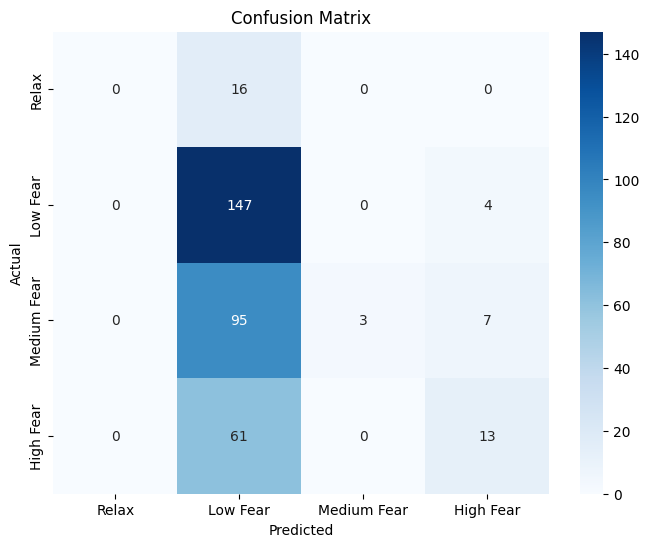

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Prepare test data for student model (only physiological signals)
X_test_student = X_test[:, -8:].reshape((X_test.shape[0], -1, 1))

# Get predictions from the student model
y_pred_prob = student_model.predict(X_test_student)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of Student Model: {accuracy:.2f}')

test_f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f"Testing F1 Score: {test_f1:.2f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Relax', 'Low Fear', 'Medium Fear', 'High Fear'],
            yticklabels=['Relax', 'Low Fear', 'Medium Fear', 'High Fear'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Reshape student data for LSTM input (batch_size, time_steps, features)
X_student_reshaped = X_student.reshape((X_student.shape[0], X_student.shape[1], 1))

# Create and compile student model
student_model = create_student_model((X_student.shape[1], 1))  # (8 time steps, 1 feature)
student_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# def create_student_model(input_shape):
#     model = Sequential()
#     model.add(LSTM(32, input_shape=input_shape))  # LSTM layer
#     model.add(Dropout(0.5))  # Dropout layer for regularization
#     model.add(Dense(16, activation='relu'))  # Dense layer
#     model.add(Dropout(0.5))  # Another Dropout layer
#     model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes
#     return model

# without KD

# Train the student model with ground tru labels
temp_history= student_model.fit(X_student_reshaped, y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_test[:, -8:].reshape((X_test.shape[0], 8, 1)), y_test_one_hot))


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2488 - loss: 1.4704 - val_accuracy: 0.4855 - val_loss: 1.3100
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3736 - loss: 1.3405 - val_accuracy: 0.4538 - val_loss: 1.2647
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3986 - loss: 1.2829 - val_accuracy: 0.4653 - val_loss: 1.2291
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3897 - loss: 1.2828 - val_accuracy: 0.4509 - val_loss: 1.2186
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3656 - loss: 1.2727 - val_accuracy: 0.4566 - val_loss: 1.2093
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3867 - loss: 1.2523 - val_accuracy: 0.4566 - val_loss: 1.2034
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4181 - loss: 1.2292 - val_accuracy: 0.4913 - val_loss: 1.1906
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4173 - loss: 1.2244 - val_accuracy: 0.4769 - 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Prepare test data for student model (only physiological signals)
X_test_student = X_test[:, -8:].reshape((X_test.shape[0], -1, 1))

# Get predictions from the student model
y_pred_prob = student_model.predict(X_test_student)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of Student Model: {accuracy:.2f}')

test_f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f'F1-score of Student Model: {test_f1:.2f}')

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# # Create confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plotting confusion matrix using seaborn heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Relax', 'Low Fear', 'Medium Fear', 'High Fear'],
#             yticklabels=['Relax', 'Low Fear', 'Medium Fear', 'High Fear'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy of Student Model: 48.84
F1-score of Student Model: 39.71
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.48      0.94      0.63       151
         2.0       0.63      0.11      0.19       105
         3.0       0.52      0.20      0.29        74

    accuracy                           0.49       346
   macro avg       0.41      0.31      0.28       346
weighted avg       0.51      0.49      0.40       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt

def plot_loss(teacher_history, student_history, temp_history):
    # Extract loss for each model
    teacher_loss = teacher_history.history['loss']
    student_loss = student_history.history['loss']
    temp_loss = temp_history.history['loss']

    # Define the range of epochs
    teacher_epochs = range(len(teacher_loss))
    student_epochs = range(len(student_loss))
    temp_epochs = range(len(temp_loss))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot teacher model loss
    plt.plot(teacher_epochs, teacher_loss, label='Teacher Model Loss', color='blue')

    # Plot student model loss (trained with soft targets)
    plt.plot(student_epochs, student_loss, label='Student Model Loss (Soft Targets)', color='green')

    # Plot temp student model loss (trained directly with 8 physiological signals)
    plt.plot(temp_epochs, temp_loss, label='Student Model Loss (8 Signals)', color='red')

    # Add labels and title
    plt.title('Epochs vs Loss for Teacher and Student Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

# Call the plotting function
plot_loss(teacher_history, student_history, temp_history)



In [ ]:
# Function to plot accuracy over epochs
def plot_accuracy(teacher_history, student_history, temp_history):
    # Get accuracy from each model's history
    teacher_acc = teacher_history.history['accuracy']
    student_acc = student_history.history['accuracy']
    temp_acc = temp_history.history['accuracy']

    # Get the number of epochs
    epochs = range(1, len(teacher_acc) + 1)

    # Plot the accuracy over epochs for each model
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, teacher_acc, 'b-', label='Teacher Model Accuracy')
    plt.plot(epochs, student_acc, 'g-', label='Student Model (Distillation) Accuracy')
    plt.plot(epochs, temp_acc, 'r-', label='Student Model (No Distillation) Accuracy')

    # Add title and labels
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Assuming you have already captured the history objects:
# teacher_history, student_history, temp_history
plot_accuracy(teacher_history, student_history, temp_history)

In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,572 (76.45 KB)

 Trainable params: 19,572 (76.45 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,948 (19.33 KB)

 Trainable params: 4,948 (19.33 KB)

 Non-trainable params: 0 (0.00 B)

None


### Using Temporal CNN

<p>Teacher model with 40 channels: accuracy- 92.49, f1 score - 92.45</p>
<p>student model with 40 channels and KD: accuracy - 93.35, f1 score - 93.35</p>
<p>student model with 40 channels and without KD: accuracy - 92.77, f1 score - 92.76</p>

<p>student model with 8 channels and KD: accuracy - 76.01, f1 score - 76.02</p>
<p>student model with 8 channels and without KD: accuracy - 79.19, f1 score - 79.08</p>

In [ ]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, InputLayer
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import InputLayer, Conv1D, Flatten, Dense
from keras.callbacks import Callback

In [ ]:
# Custom transformer to flatten the input data
class FlattenTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.reshape(X.shape[0], -1)

# Define your TCN-like model using Conv1D layers
def create_tcn_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(40, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    # model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=4, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Define the pipeline with flattening and scaling
pipeline_teacher = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_model(), epochs=100, batch_size=20, verbose=1))
])

y_encoded = to_categorical(y_train)
y_encoded_test = to_categorical(y_test)

# Fit the pipeline on the training data
pipeline_teacher.fit(X_train, y_encoded)

# 70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
# Training Accuracy: 100.00%
# Training F1 Score: 100.00
# Training Recall Score: 1.00
# Training Precision Score: 1.00
# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
# Testing Accuracy: 92.49%
# Testing F1 Score: 92.45
# Testing Recall Score: 0.92
# Testing Precision Score: 0.93

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4543 - loss: 1.2016
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6355 - loss: 0.8362
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7535 - loss: 0.6192
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8196 - loss: 0.4756
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8542 - loss: 0.4461
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8820 - loss: 0.3244
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8819 - loss: 0.3263
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9098 - loss: 0.2738
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9277 - loss: 0.2402
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9338 - loss: 0.2096
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9061 - loss: 0.2609
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9634 

In [ ]:
# Initialize a list to store loss and accuracy
import keras
from keras.callbacks import Callback
import numpy as np

metrics = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

# Update the pipeline to include the custom callback
pipeline_teacher = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_model(), epochs=100, batch_size=20, verbose=1,
                            callbacks=[MetricsCallback()]))
])

# Fit the pipeline on the training data
pipeline_teacher.fit(X_train, y_encoded)

# Print the collected metrics after training
print(metrics)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4593 - loss: 1.1921
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6731 - loss: 0.8242
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7764 - loss: 0.6306
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8133 - loss: 0.5043
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8384 - loss: 0.4486
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8723 - loss: 0.3802
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8980 - loss: 0.3058
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9324 - loss: 0.2486
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9343 - loss: 0.2157
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9261 - loss: 0.2334
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9682 - loss: 0.1337
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9645 - lo

In [ ]:
# Evaluate training accuracy
Y_train_pred_encoded = student_pipeline.predict(X_train[:,32:])
Y_train_pred = np.argmax(Y_train_pred_encoded, axis=1)
train_accuracy = accuracy_score(np.argmax(y_encoded, axis=1), Y_train_pred)
train_f1 = f1_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted') * 100
train_recall = recall_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted')
train_precision = precision_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}")
print(f"Training Recall Score: {train_recall:.2f}")
print(f"Training Precision Score: {train_precision:.2f}")

# Evaluate testing accuracy
Y_test_pred_encoded = student_pipeline.predict(X_test[:, 32:])
Y_test_pred = np.argmax(Y_test_pred_encoded, axis=1)
test_accuracy = accuracy_score(np.argmax(y_encoded_test, axis=1), Y_test_pred)
test_f1 = f1_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted') * 100
test_recall = recall_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted')
test_precision = precision_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted')

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing F1 Score: {test_f1:.2f}")
print(f"Testing Recall Score: {test_recall:.2f}")
print(f"Testing Precision Score: {test_precision:.2f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training Accuracy: 99.06%
Training F1 Score: 99.06
Training Recall Score: 0.99
Training Precision Score: 0.99
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Accuracy: 76.01%
Testing F1 Score: 76.02
Testing Recall Score: 0.76
Testing Precision Score: 0.76


In [ ]:
# this model for only 8 pps signals

def create_tcn_student_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(8, 1)))
    model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=1, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Without KD
# Define the pipeline with flattening and scaling without Knowledge distillation
metrics2 = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics2.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

student_pipeline = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_student_model(), epochs=100, batch_size=20, verbose=1,callbacks=[MetricsCallback()]))
])

# Fit the pipeline on the training data
student_pipeline.fit(X_train[:,32:], y_encoded)

# 70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
# Training Accuracy: 96.67%
# Training F1 Score: 96.66
# Training Recall Score: 0.97
# Training Precision Score: 0.97
# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Testing Accuracy: 79.19%
# Testing F1 Score: 79.08
# Testing Recall Score: 0.79
# Testing Precision Score: 0.80


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3952 - loss: 1.2386
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 1.0809
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5289 - loss: 0.9994
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - loss: 0.9325
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5845 - loss: 0.8975
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6232 - loss: 0.8466
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.8127
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.7293
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6961 - loss: 0.6897
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6898
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7498 - loss: 0.6212
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7576 - lo

Pipeline(steps=[('flatten', FlattenTransformer()),
                ('standardize', StandardScaler()),
                ('tcn',
                 KerasClassifier(batch_size=20, callbacks=[<__main__.MetricsCallback object at 0x7f589482fb50>], epochs=100, model=<Sequential name=sequential_14, built=True>))])

In [ ]:
# Applying the KD for the TCN student - 8 pps model with the TCN teacher model

metrics3 = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics3.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

# Generate soft targets from Teacher Model for Student Training
soft_targets = pipeline_teacher.predict(X_train)

student_pipeline = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_student_model(), epochs=100, batch_size=20, verbose=1, callbacks=[MetricsCallback()]))
])

# Fit the pipeline on the training data
student_pipeline.fit(X_train[:,32:], soft_targets)

# 70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# Training Accuracy: 99.06%
# Training F1 Score: 99.06
# Training Recall Score: 0.99
# Training Precision Score: 0.99
# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# Testing Accuracy: 76.01%
# Testing F1 Score: 76.02
# Testing Recall Score: 0.76
# Testing Precision Score: 0.76

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4156 - loss: 1.2498
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5085 - loss: 1.0703
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5457 - loss: 0.9771
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5618 - loss: 0.9442
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5867 - loss: 0.8779
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6568 - loss: 0.8038
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6456 - loss: 0.7968
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6683 - loss: 0.7523
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7120 - loss: 0.6786
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7106 - loss: 0.6700
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7384 - loss: 0.6225
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7062 - lo

Pipeline(steps=[('flatten', FlattenTransformer()),
                ('standardize', StandardScaler()),
                ('tcn',
                 KerasClassifier(batch_size=20, callbacks=[<__main__.MetricsCallback object at 0x7f5893d2fee0>], epochs=100, model=<Sequential name=sequential_15, built=True>))])

In [ ]:
print(pipeline_teacher.named_steps['tcn'].model_.summary())
print(student_pipeline.named_steps['tcn'].model_.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 34, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2176)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         278,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,342 (3.34 MB)

 Trainable params: 291,780 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 583,562 (2.23 MB)

None


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 7, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 5, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,158 (586.56 KB)

 Trainable params: 50,052 (195.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,106 (391.04 KB)

None


####Using 40 channels for student model

In [ ]:
# Applying the KD for the TCN student model - 40 channels with the TCN teacher model

# this model for only 40 pps signals with reduced parameters

def create_tcn_student_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(40, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

y_encoded = to_categorical(y_train)
y_encoded_test = to_categorical(y_test)

# Generate soft targets from Teacher Model for Student Training
soft_targets = pipeline_teacher.predict(X_train)
metrics5 = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics5.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

student_pipeline = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_student_model(), epochs=100, batch_size=20, verbose=1, callbacks=[MetricsCallback()]))
])

# Fit the pipeline on the training data
student_pipeline.fit(X_train, soft_targets)

## With KD

# 70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
# Training Accuracy: 100.00%
# Training F1 Score: 100.00
# Training Recall Score: 1.00
# Training Precision Score: 1.00
# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Testing Accuracy: 93.35%
# Testing F1 Score: 93.35
# Testing Recall Score: 0.93
# Testing Precision Score: 0.93

## without KD
# 70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
# Training Accuracy: 100.00%
# Training F1 Score: 100.00
# Training Recall Score: 1.00
# Training Precision Score: 1.00
# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# Testing Accuracy: 92.77%
# Testing F1 Score: 92.76
# Testing Recall Score: 0.93
# Testing Precision Score: 0.93

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4037 - loss: 1.2357
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5701 - loss: 0.9009
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7444 - loss: 0.6919
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8111 - loss: 0.4880
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8663 - loss: 0.3813
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8739 - loss: 0.3670
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9096 - loss: 0.2774
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9253 - loss: 0.2223
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9477 - loss: 0.1829
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9687 - loss: 0.1280
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9552 - loss: 0.1354
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 

Pipeline(steps=[('flatten', FlattenTransformer()),
                ('standardize', StandardScaler()),
                ('tcn',
                 KerasClassifier(batch_size=20, callbacks=[<__main__.MetricsCallback object at 0x7e549a08ebf0>], epochs=100, model=<Sequential name=sequential_7, built=True>))])

In [ ]:
# Evaluate training accuracy

# Y_train_pred_encoded = pipeline.predict(X_train)
Y_train_pred_encoded = student_pipeline.predict(X_train)
Y_train_pred = np.argmax(Y_train_pred_encoded, axis=1)
train_accuracy = accuracy_score(np.argmax(y_encoded, axis=1), Y_train_pred)
train_f1 = f1_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted') * 100
train_recall = recall_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted')
train_precision = precision_score(np.argmax(y_encoded, axis=1), Y_train_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}")
print(f"Training Recall Score: {train_recall:.2f}")
print(f"Training Precision Score: {train_precision:.2f}")

# Evaluate testing accuracy
# Y_test_pred_encoded = pipeline.predict(X_test)
Y_test_pred_encoded = student_pipeline.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_encoded, axis=1)
test_accuracy = accuracy_score(np.argmax(y_encoded_test, axis=1), Y_test_pred)
test_f1 = f1_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted') * 100
test_recall = recall_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted')
test_precision = precision_score(np.argmax(y_encoded_test, axis=1), Y_test_pred, average='weighted')

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing F1 Score: {test_f1:.2f}")
print(f"Testing Recall Score: {test_recall:.2f}")
print(f"Testing Precision Score: {test_precision:.2f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training Accuracy: 100.00%
Training F1 Score: 100.00
Training Recall Score: 1.00
Training Precision Score: 1.00
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testing Accuracy: 92.77%
Testing F1 Score: 92.76
Testing Recall Score: 0.93
Testing Precision Score: 0.93


In [ ]:
# Access the Keras model from the KerasClassifier in the pipeline
tcn_model = pipeline.named_steps['tcn'].model_

# Print the summary of the TCN model
tcn_model.summary()

# Access the Keras model from the KerasClassifier in the pipeline
tcn_model = student_pipeline.named_steps['tcn'].model_

# Print the summary of the TCN model
tcn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_47 (Conv1D)                   │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_48 (Conv1D)                   │ (None, 34, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 2176)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │         278,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,342 (3.34 MB)

 Trainable params: 291,780 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 583,562 (2.23 MB)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_49 (Conv1D)                   │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_50 (Conv1D)                   │ (None, 34, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_51 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │         245,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,094 (3.11 MB)

 Trainable params: 271,364 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 542,730 (2.07 MB)

###TCN With 5-fold cross validation
<p>Teacher model: Accuracy: 0.9306, F1 Score: 0.9306</p>
<p>Student Model with 8 pps: Accuracy: 0.7687, F1 Score: 0.7681</p>
<p>Student Model with 40 channels: Accuracy: 0.9219, F1 Score: 0.9220</p>
<p>Student model with 8 pps no KD: Accuracy: 0.7832, F1 Score: 0.7832</p>


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold

metrics = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

# Define the pipeline with flattening and scaling
pipeline_teacher = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_model(), epochs=100, batch_size=20, verbose=1, callbacks=[MetricsCallback()]))
])

y_encoded = to_categorical(y_train)
y_encoded_test = to_categorical(y_test)

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_scores = []
f1_scores = []

# Perform cross-validation manually to get detailed metrics
for train_idx, val_idx in kfold.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # Fit the model on the current fold
    pipeline_teacher.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = pipeline_teacher.predict(X_val_fold)

    # Convert predictions back to class labels (from one-hot encoding)
    y_val_fold_labels = y_val_fold.argmax(axis=1)
    y_pred_fold_labels = y_pred_fold.argmax(axis=1)

    # Calculate metrics
    acc = accuracy_score(y_val_fold_labels, y_pred_fold_labels)
    f1 = f1_score(y_val_fold_labels, y_pred_fold_labels, average='weighted')

    # Store the results
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    # Print the classification report for the current fold
    print(f"Fold {len(accuracy_scores)} Classification Report:")
    print(classification_report(y_val_fold_labels, y_pred_fold_labels))

# Print the average accuracy and F1 scores across all folds
print("Cross-validation Accuracy scores:", accuracy_scores)
print("Mean accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", sum(f1_scores) / len(f1_scores))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4326 - loss: 1.2384
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6109 - loss: 0.8974
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7422 - loss: 0.6635
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7820 - loss: 0.5778
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8624 - loss: 0.4410
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8529 - loss: 0.5100
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8819 - loss: 0.3713
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8897 - loss: 0.3316
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9176 - loss: 0.2748
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9337 - loss: 0.2056
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9472 - loss: 0.1843
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9452 - l

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Make predictions on the test set
# y_pred = pipeline_teacher.predict(X_test)
# y_pred = student_pipeline.predict(X_test)
y_pred = student_pipeline.predict(X_test)

# Convert the one-hot encoded predictions back to single class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels back to single class labels
y_test_classes = np.argmax(y_encoded_test, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))

#teacher model
# Accuracy: 0.930635838150289
# F1 Score: 0.9307854001277291

#student with 40 with kd
# Accuracy: 0.9248554913294798
# F1 Score: 0.924233662908216

#student with 40 without KD
# Accuracy: 0.9132947976878613
# F1 Score: 0.9131920746625416

#student with 8 with KD
# Accuracy: 0.7716763005780347
# F1 Score: 0.7716928231952385

#student with 8 without kd
# Accuracy: 0.7630057803468208
# F1 Score: 0.763305091548424

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.9132947976878613
F1 Score: 0.9131920746625416

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.92      0.94      0.93       151
           2       0.92      0.89      0.90       105
           3       0.87      0.92      0.89        74

    accuracy                           0.91       346
   macro avg       0.93      0.89      0.91       346
weighted avg       0.91      0.91      0.91       346



In [ ]:
# Applying the KD for the TCN student model - 40 channels with the TCN teacher model

# this model for only 40 pps signals with reduced layer and 5 fold cross validation

def create_tcn_student_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(40, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

metrics3 = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics3.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

student_pipeline = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_student_model(), epochs=100, batch_size=20, verbose=1, callbacks=[MetricsCallback()]))
])

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_scores = []
f1_scores = []

# Perform cross-validation manually to get detailed metrics
for train_idx, val_idx in kfold.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # Generate soft targets from Teacher Model for Student Training
    # soft_targets = pipeline_teacher.predict(X_train_fold)
    # Fit the model on the current fold
    student_pipeline.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = pipeline_teacher.predict(X_val_fold)

    # Convert predictions back to class labels (from one-hot encoding)
    y_val_fold_labels = y_val_fold.argmax(axis=1)
    y_pred_fold_labels = y_pred_fold.argmax(axis=1)

    # Calculate metrics
    acc = accuracy_score(y_val_fold_labels, y_pred_fold_labels)
    f1 = f1_score(y_val_fold_labels, y_pred_fold_labels, average='weighted')

    # Store the results
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    # Print the classification report for the current fold
    print(f"Fold {len(accuracy_scores)} Classification Report:")
    print(classification_report(y_val_fold_labels, y_pred_fold_labels))

# Print the average accuracy and F1 scores across all folds
print("Cross-validation Accuracy scores:", accuracy_scores)
print("Mean accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", sum(f1_scores) / len(f1_scores))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4451 - loss: 1.2152
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5881 - loss: 0.9103
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7361 - loss: 0.7064
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7875 - loss: 0.5610
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8427 - loss: 0.4405
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8354 - loss: 0.5830
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8669 - loss: 0.3287
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9199 - loss: 0.2566
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9237 - loss: 0.2374
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9398 - loss: 0.1901
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9601 - loss: 0.1536
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9632

In [ ]:
# 40 channels with the TCN teacher model

# this model for only 8 pps signals with reduced layer and 5 fold cross validation with and without KD

def create_tcn_student_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(8, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    # model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

metrics2 = []

# Define a custom callback to store loss and accuracy after each epoch
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        accuracy = logs.get('accuracy')
        metrics2.append({'epoch': epoch + 1, 'loss': loss, 'accuracy': accuracy})

student_pipeline2 = Pipeline([
    ('flatten', FlattenTransformer()),
    ('standardize', StandardScaler()),
    ('tcn', KerasClassifier(model=create_tcn_student_model(), epochs=100, batch_size=20, verbose=1, callbacks=[MetricsCallback()]))
])

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_scores = []
f1_scores = []

# Perform cross-validation manually to get detailed metrics
for train_idx, val_idx in kfold.split(X_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # Generate soft targets from Teacher Model for Student Training
    soft_targets = pipeline_teacher.predict(X_train_fold)
    # Fit the model on the current fold
    student_pipeline2.fit(X_train_fold[:,32:], soft_targets)

    #training with hard labels

    # student_pipeline2.fit(X_train_fold[:,32:], y_train_fold)

    # Predict on the validation set
    y_pred_fold = pipeline_teacher.predict(X_val_fold)

    # Convert predictions back to class labels (from one-hot encoding)
    y_val_fold_labels = y_val_fold.argmax(axis=1)
    y_pred_fold_labels = y_pred_fold.argmax(axis=1)

    # Calculate metrics
    acc = accuracy_score(y_val_fold_labels, y_pred_fold_labels)
    f1 = f1_score(y_val_fold_labels, y_pred_fold_labels, average='weighted')

    # Store the results
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    # Print the classification report for the current fold
    print(f"Fold {len(accuracy_scores)} Classification Report:")
    print(classification_report(y_val_fold_labels, y_pred_fold_labels))

# Print the average accuracy and F1 scores across all folds
print("Cross-validation Accuracy scores:", accuracy_scores)
print("Mean accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", sum(f1_scores) / len(f1_scores))

 1/56 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3621 - loss: 1.3004
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4666 - loss: 1.0893
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5189 - loss: 1.0147
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5344 - loss: 0.9687
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 0.9239
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6248 - loss: 0.8670
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6704 - loss: 0.7930
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6721 - loss: 0.7529
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6498 - loss: 0.7488
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6779 - loss: 0.7267
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6909 - loss: 0.6908
Epoch 12/100
56/56 ━━━━━

In [ ]:
teacherloss = []
teacheracc = []
nstudloss = []
nstudacc = []
studloss = []
studacc = []

# metrics = metrics[:100]
for item in metrics:
    teacherloss.append(item['loss'])
    teacheracc.append(item['accuracy'])
for item in metrics2:
    nstudloss.append(item['loss'])
    nstudacc.append(item['accuracy'])
for item in metrics3:
    studloss.append(item['loss'])
    studacc.append(item['accuracy'])
print(teacherloss)
print(teacheracc)
# print(studloss)
# print(studacc)

[1.1085710525512695, 0.7926556468009949, 0.6523367166519165, 0.5528551340103149, 0.48211047053337097, 0.44902074337005615, 0.34961968660354614, 0.34466788172721863, 0.3039117753505707, 0.2632679343223572, 0.19971542060375214, 0.19833801686763763, 0.16719837486743927, 0.163405641913414, 0.1586054116487503, 0.17343787848949432, 0.09492556750774384, 0.0799844041466713, 0.07739340513944626, 0.07218971103429794, 0.08463670313358307, 0.05054612457752228, 0.06099424138665199, 0.06689102202653885, 0.07069018483161926, 0.054340384900569916, 0.02396918460726738, 0.04149528965353966, 0.02959778718650341, 0.02758081443607807, 0.021096594631671906, 0.04451526328921318, 0.019938595592975616, 0.00995281245559454, 0.018440380692481995, 0.012651280499994755, 0.008875676430761814, 0.019730987027287483, 0.008406163193285465, 0.008798866532742977, 0.015423454344272614, 0.005528366658836603, 0.007734339218586683, 0.01580040343105793, 0.02710467204451561, 0.00729625066742301, 0.003423494752496481, 0.0026304

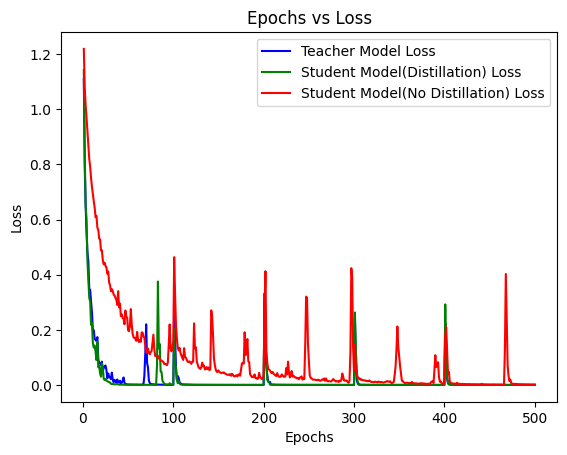

In [ ]:
import matplotlib.pyplot as plt

# epochs = list(range(1, 501))
# plt.plot(epochs, teacheracc, label='Teacher Model accuracy', color = "blue")
# plt.plot(epochs, studacc, label='Student Model(Distillation) accuracy', color = "green")
# plt.plot(epochs, nstudacc, label='Student Model(No Distillation) accuracy', color = "red")
# plt.title('Epochs vs Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid()
epochs = list(range(1, 501))
plt.plot(epochs, teacherloss, label='Teacher Model Loss', color = "blue")
plt.plot(epochs, studloss, label='Student Model(Distillation) Loss', color = "green")
plt.plot(epochs, nstudloss, label='Student Model(No Distillation) Loss', color = "red")
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Make predictions on the test set
y_pred = student_pipeline.predict(X_test[:, 32:])

# Convert the one-hot encoded predictions back to single class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels back to single class labels
y_test_classes = np.argmax(y_encoded_test, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))

# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step with kd
# Accuracy: 0.9219653179190751
# F1 Score: 0.9220532842731181

# 18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
# Accuracy: 0.7832369942196532
# F1 Score: 0.7832315378488834


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.7832369942196532
F1 Score: 0.7832315378488834

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.82      0.79      0.81       151
           2       0.76      0.77      0.77       105
           3       0.76      0.81      0.78        74

    accuracy                           0.78       346
   macro avg       0.75      0.75      0.75       346
weighted avg       0.78      0.78      0.78       346



In [ ]:
print(pipeline_teacher.named_steps['tcn'].model_.summary())
print(student_pipeline.named_steps['tcn'].model_.summary())
print(student_pipeline2.named_steps['tcn'].model_.summary())


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)                   │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 34, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2176)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │         278,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,342 (3.34 MB)

 Trainable params: 291,780 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 583,562 (2.23 MB)

None


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_23 (Conv1D)                   │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_24 (Conv1D)                   │ (None, 34, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_25 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │         245,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,094 (3.11 MB)

 Trainable params: 271,364 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 542,730 (2.07 MB)

None


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)                   │ (None, 6, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 2, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,910 (347.31 KB)

 Trainable params: 29,636 (115.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,274 (231.54 KB)

None


## Using CNN and LSTM hybrid for both teacher and student model
<p>Teacher model with 40 channels: accuracy - 77.75, f1 score - 78.27</p>
<p>student model with 8 channels and KD: accuracy - , f1 score - </p>
<p>student model with 40 channels and without KD: accuracy - , f1 score - </p>

In [ ]:
eeg_signals_train = X_train[:, :32]
phys_signals_train = X_train[:, 32:]
eeg_signals_test = X_test[:, :32]
phys_signals_test = X_test[:, 32:]
X_train_EEG = eeg_signals_train
X_train_Phys = phys_signals_train
X_test_EEG = eeg_signals_test
X_test_Phys = phys_signals_test

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

def create_teacher_model():
    input_eeg = layers.Input(shape=(32,))
    input_phys = layers.Input(shape=(8,))

    # CNN branch for EEG signals
    x_eeg = layers.Reshape((32, 1))(input_eeg)
    x_eeg = layers.Conv1D(64, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Conv1D(128, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Flatten()(x_eeg)

    # LSTM branch for physiological signals
    x_phys = layers.Reshape((8, 1))(input_phys)
    x_phys = layers.LSTM(64, return_sequences=False)(x_phys)

    # Combine both branches
    combined = layers.Concatenate()([x_eeg, x_phys])
    combined = layers.Dense(128, activation='relu')(combined)
    output = layers.Dense(4, activation='softmax')(combined)

    model = models.Model(inputs=[input_eeg, input_phys], outputs=output)
    return model

teacher_model = create_teacher_model()
teacher_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
teacher_model.fit([eeg_signals_train, phys_signals_train], y_train, epochs=50, validation_data=([eeg_signals_test, phys_signals_test], y_test))
# Accuracy: 0.8931
# F1 Score: 0.8944

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4803 - loss: 1.1972 - val_accuracy: 0.5578 - val_loss: 1.0412
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5514 - loss: 1.0651 - val_accuracy: 0.5838 - val_loss: 0.9475
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5761 - loss: 0.9331 - val_accuracy: 0.6185 - val_loss: 0.8970
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6119 - loss: 0.8800 - val_accuracy: 0.6676 - val_loss: 0.8231
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6741 - loss: 0.8117 - val_accuracy: 0.6936 - val_loss: 0.7812
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6760 - loss: 0.7404 - val_accuracy: 0.6908 - val_loss: 0.7355
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7213 - loss: 0.7262 - val_accuracy: 0.7457 - val_loss: 0.6629
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7641 - loss: 0.6225 - val_accuracy: 0.7225 - v

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

def create_student_model():
    input_phys = layers.Input(shape=(8,))

    # LSTM branch for physiological signals
    x_phys = layers.Reshape((8, 1))(input_phys)
    x_phys = layers.Conv1D(64, kernel_size=2, activation='relu')(x_phys)
    x_phys = layers.MaxPooling1D(pool_size=2)(x_phys)
    x_phys = layers.LSTM(64, return_sequences=False)(x_phys)

    x_phys = layers.Dense(64, activation='relu')(x_phys)
    output = layers.Dense(4, activation='softmax')(x_phys)

    model = models.Model(inputs=[input_phys], outputs=output)
    return model

student_model = create_student_model()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
student_model.fit([phys_signals_train], y_train, epochs=50, validation_data=([phys_signals_test], y_test))

# Accuracy: 0.5491
# F1 Score: 0.5251

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3354 - loss: 1.3576 - val_accuracy: 0.5116 - val_loss: 1.1228
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4474 - loss: 1.1822 - val_accuracy: 0.5116 - val_loss: 1.1305
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4502 - loss: 1.1670 - val_accuracy: 0.5058 - val_loss: 1.0921
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 1.1380 - val_accuracy: 0.5578 - val_loss: 1.0769
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4946 - loss: 1.1109 - val_accuracy: 0.4827 - val_loss: 1.1038
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5011 - loss: 1.1026 - val_accuracy: 0.4913 - val_loss: 1.0946
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4571 - loss: 1.1219 - val_accuracy: 0.5000 - val_loss: 1.1066
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4877 - loss: 1.0995 - val_accuracy: 0.4971 - val_los

In [ ]:
from keras.callbacks import Callback

# Define a custom callback to store loss and accuracy for training and validation
class LossAccuracyHistory(Callback):
    def on_train_begin(self, logs=None):
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        # Store training loss and accuracy
        self.train_losses.append(logs.get('loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        # Store validation loss and accuracy
        self.val_losses.append(logs.get('val_loss'))
        self.val_accuracies.append(logs.get('val_accuracy'))

# Instantiate the callback
history_callback = LossAccuracyHistory()

# Fit the student model
student_model.fit(
    [phys_signals_train], y_train,
    epochs=100,
    validation_data=([phys_signals_test], y_test),
    callbacks=[history_callback]
)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3582 - loss: 1.2966 - val_accuracy: 0.4884 - val_loss: 1.1278
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4658 - loss: 1.1790 - val_accuracy: 0.5087 - val_loss: 1.1267
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4683 - loss: 1.1647 - val_accuracy: 0.4740 - val_loss: 1.1175
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4672 - loss: 1.1158 - val_accuracy: 0.4769 - val_loss: 1.1217
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4637 - loss: 1.1314 - val_accuracy: 0.5231 - val_loss: 1.0851
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4802 - loss: 1.1028 - val_accuracy: 0.4884 - val_loss: 1.1346
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4636 - loss: 1.1138 - val_accuracy: 0.5058 - val_loss: 1.0846
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4970 - loss: 1.0848 - val_accuracy: 0.5058 

In [ ]:
# Access the losses and accuracies
studtrain_losses = history_callback.train_losses
studtrain_accuracies = history_callback.train_accuracies

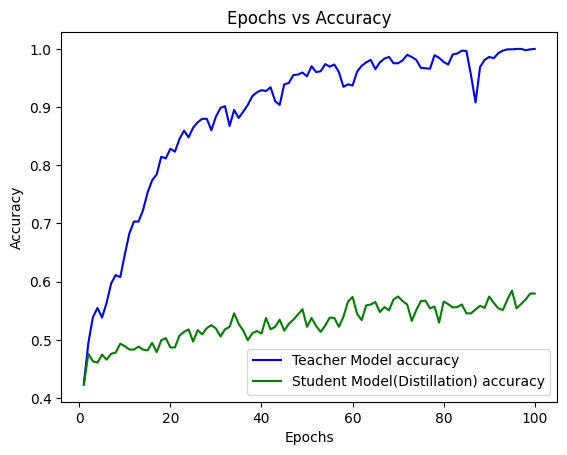

In [ ]:
import matplotlib.pyplot as plt

# epochs = list(range(1, 501))
plt.plot(epochs, teachtrain_accuracies, label='Teacher Model accuracy', color = "blue")
plt.plot(epochs, studtrain_accuracies, label='Student Model(Distillation) accuracy', color = "green")
# plt.plot(epochs, nstudacc, label='Student Model(No Distillation) accuracy', color = "red")
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.grid()
# epochs = list(range(1, 101))
# plt.plot(epochs, teachtrain_losses, label='Teacher Model Loss', color = "blue")
# plt.plot(epochs, studtrain_losses, label='Student Model(Distillation) Loss', color = "green")
# # plt.plot(epochs, nstudloss, label='Student Model(No Distillation) Loss', color = "red")
# plt.title('Epochs vs Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid()

In [ ]:
# Make predictions
y_pred = student_model.predict([phys_signals_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

In [ ]:
# applying the KD for the CNN and LSTM student model
student_model = create_student_model()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Accuracy: 0.5751
# F1 Score: 0.5647

In [ ]:
student_model = create_teacher_model()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Accuracy: 0.7775
# F1 Score: 0.7827

In [ ]:
# for CNN-LSTM teacher and CNN-LSTM student

import tensorflow as tf
from tensorflow.keras import losses, optimizers

def distill_teacher_to_student(teacher_model, student_model, X_train_phys, y_train, temperature=3, alpha=0.5, epochs=10, batch_size=32):
    # Convert labels to categorical (soft labels not needed for distillation)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in range(0, len(X_train_phys), batch_size):
            # Get batch data
            X_batch = X_train_phys[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                # Get teacher model predictions (soft labels)
                teacher_logits = teacher_model([eeg_signals_train[i:i+batch_size], X_batch], training=False)
                teacher_probs = tf.nn.softmax(teacher_logits / temperature)

                # Get student model predictions
                student_logits = student_model([eeg_signals_train[i:i+batch_size], X_batch], training=True)
                student_probs = tf.nn.softmax(student_logits / temperature)

                # Distillation loss (between soft targets from teacher and student)
                distillation_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(teacher_probs, student_probs)
                )

                # Hard target loss (between true labels and student outputs)
                hard_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(y_batch, student_logits)
                )

                # Combined loss
                loss = alpha * distillation_loss + (1 - alpha) * hard_loss

            # Compute gradients
            grads = tape.gradient(loss, student_model.trainable_weights)
            optimizers.Adam().apply_gradients(zip(grads, student_model.trainable_weights))

        print(f"Loss: {loss.numpy()}")

# Distill knowledge from teacher to student
distill_teacher_to_student(teacher_model, student_model, phys_signals_train, y_train, epochs=50)


Epoch 1/50
Loss: 0.9455141425132751
Epoch 2/50
Loss: 0.8577882051467896
Epoch 3/50
Loss: 0.8218518495559692
Epoch 4/50
Loss: 0.7915941476821899
Epoch 5/50
Loss: 0.778545618057251
Epoch 6/50
Loss: 0.7676621079444885
Epoch 7/50
Loss: 0.748263418674469
Epoch 8/50
Loss: 0.7389328479766846
Epoch 9/50
Loss: 0.7233762145042419
Epoch 10/50
Loss: 0.7231774926185608
Epoch 11/50
Loss: 0.7413961887359619
Epoch 12/50
Loss: 0.771192193031311
Epoch 13/50
Loss: 0.7405998706817627
Epoch 14/50
Loss: 0.7755367755889893
Epoch 15/50
Loss: 0.8646643161773682
Epoch 16/50
Loss: 0.950154185295105
Epoch 17/50
Loss: 1.1085891723632812
Epoch 18/50
Loss: 1.0295817852020264
Epoch 19/50
Loss: 0.9263003468513489
Epoch 20/50
Loss: 1.1643168926239014
Epoch 21/50
Loss: 1.1465178728103638
Epoch 22/50
Loss: 1.083524465560913
Epoch 23/50
Loss: 0.9536473751068115
Epoch 24/50
Loss: 1.0298707485198975
Epoch 25/50
Loss: 0.8407856225967407
Epoch 26/50
Loss: 0.7801840901374817
Epoch 27/50
Loss: 0.9535982608795166
Epoch 28/50
Los

## Using CNN and LSTM hybrid for teacher model
<p> Tried different student models:</p>
<p>Teacher model: Accuracy: 91.33,
F1 Score: 91.47
<ol>
<li>LSTM - Accuracy: 51.73, F1 Score: 44.26</li>
<li>DNN-300: Accuracy: 64.45, F1 Score: 64.34</li>


In [ ]:
eeg_signals_train = X_train[:, :32]
phys_signals_train = X_train[:, 32:]
eeg_signals_test = X_test[:, :32]
phys_signals_test = X_test[:, 32:]
X_train_EEG = eeg_signals_train
X_train_Phys = phys_signals_train
X_test_EEG = eeg_signals_test
X_test_Phys = phys_signals_test

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

def create_teacher_model():
    input_eeg = layers.Input(shape=(32,))
    input_phys = layers.Input(shape=(8,))

    # CNN branch for EEG signals
    x_eeg = layers.Reshape((32, 1))(input_eeg)
    x_eeg = layers.Conv1D(64, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Conv1D(128, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Flatten()(x_eeg)

    # LSTM branch for physiological signals
    x_phys = layers.Reshape((8, 1))(input_phys)
    x_phys = layers.LSTM(64, return_sequences=False)(x_phys)

    # Combine both branches
    combined = layers.Concatenate()([x_eeg, x_phys])
    combined = layers.Dense(128, activation='relu')(combined)
    output = layers.Dense(4, activation='softmax')(combined)

    model = models.Model(inputs=[input_eeg, input_phys], outputs=output)
    return model

teacher_model = create_teacher_model()
teacher_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
teacher_model.fit([eeg_signals_train, phys_signals_train], y_train, epochs=100, validation_data=([eeg_signals_test, phys_signals_test], y_test))


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4482 - loss: 1.2194 - val_accuracy: 0.5289 - val_loss: 1.0317
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5629 - loss: 1.0451 - val_accuracy: 0.5665 - val_loss: 0.9479
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5925 - loss: 0.9385 - val_accuracy: 0.6734 - val_loss: 0.8741
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 0.8596 - val_accuracy: 0.6329 - val_loss: 0.8090
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6433 - loss: 0.8371 - val_accuracy: 0.6908 - val_loss: 0.7272
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7043 - loss: 0.7117 - val_accuracy: 0.7110 - val_loss: 0.7409
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7279 - loss: 0.6987 - val_accuracy: 0.7457 - val_loss: 0.6536
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7747 - loss: 0.5889 - val_accuracy: 0.

In [ ]:
# Make predictions
y_pred = teacher_model.predict([eeg_signals_test, phys_signals_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.9133
F1 Score: 0.9147
Confusion Matrix:
 [[ 15   0   0   1]
 [  2 135   5   9]
 [  1   2  97   5]
 [  2   1   2  69]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.94      0.83        16
         1.0       0.98      0.89      0.93       151
         2.0       0.93      0.92      0.93       105
         3.0       0.82      0.93      0.87        74

    accuracy                           0.91       346
   macro avg       0.87      0.92      0.89       346
weighted avg       0.92      0.91      0.91       346



In [ ]:
def create_student_model():
    input_phys = layers.Input(shape=(8,))

    # LSTM for physiological signals
    x = layers.Reshape((8, 1))(input_phys)
    x = layers.LSTM(64, return_sequences=False)(x)

    # Added Dense Layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)  # Dropout layer for regularization
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)  # Dropout layer for regularization
    x = layers.Dense(32, activation='relu')(x)

    # Final Output Layer
    output = layers.Dense(4, activation='softmax')(x)

    model = models.Model(inputs=input_phys, outputs=output)
    return model

student_model_lstm = create_student_model()
student_model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
def create_student_model():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(300, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

student_model_dnn = create_student_model()
student_model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(teacher_model.summary())
print(student_model_lstm.summary())
print(student_model_dnn.summary())

Model: "functional_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 32, 1)          │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 30, 64)         │            256 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 15, 64)         │              0 │ conv1d_12[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 13, 128)        │         24,704 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_17            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 6, 128)         │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 8, 1)           │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         16,896 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 832)            │              0 │ flatten_6[0][0],       │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_46 (Dense)          │ (None, 128)            │        106,624 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 4)              │            516 │ dense_46[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 148,996 (582.02 KB)

 Trainable params: 148,996 (582.02 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 8, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,684 (139.39 KB)

 Trainable params: 35,684 (139.39 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,504 (720.72 KB)

 Trainable params: 184,504 (720.72 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
student_model = create_student_model_dnn300()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
eeg_signals_train = X_train[:, :32]
phys_signals_train = X_train[:, 32:]
eeg_signals_test = X_test[:, :32]
phys_signals_test = X_test[:, 32:]

In [ ]:
print(teacher_model.summary())
print(student_model_lstm.summary())

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 32, 1)          │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 30, 64)         │            256 │ reshape_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 15, 64)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 13, 128)        │         24,704 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 6, 128)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 8, 1)           │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         16,896 │ reshape_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 832)            │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 128)            │        106,624 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 4)              │            516 │ dense_27[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 148,996 (582.02 KB)

 Trainable params: 148,996 (582.02 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 8, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,684 (139.39 KB)

 Trainable params: 35,684 (139.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#method - 3
def distillation_loss(y_true, y_pred, teacher_logits):
    alpha = 0.5  # Weight for true labels
    temperature = 3.0

    # Cross-entropy loss with true labels
    hard_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

    # Soft targets from teacher model (using softmax with temperature scaling)
    soft_targets_teacher = tf.nn.softmax(teacher_logits / temperature)

    # Cross-entropy loss with soft targets
    soft_loss = tf.keras.losses.categorical_crossentropy(
    soft_targets_teacher,
    tf.nn.softmax(y_pred / temperature))

    # Combine losses
    return alpha * hard_loss + (1 - alpha) * soft_loss

In [ ]:
def create_student_model():
    input_eeg = layers.Input(shape=(32,))
    input_phys = layers.Input(shape=(8,))

    x_eeg = layers.Reshape((32, 1))(input_eeg)
    x_eeg = layers.Conv1D(32, kernel_size=3, activation='relu')(x_eeg)  # Fewer filters
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)

    x_phys = layers.Reshape((8, 1))(input_phys)
    x_phys = layers.LSTM(32, return_sequences=False)(x_phys)  # Fewer units

    combined = layers.Concatenate()([layers.Flatten()(x_eeg), x_phys])

    output = layers.Dense(4, activation='softmax')(combined)

    model = models.Model(inputs=[input_eeg, input_phys], outputs=output)
    return model

In [ ]:
student_model = create_student_model()

In [ ]:
#For DNN 300

import tensorflow as tf
from tensorflow.keras import losses, optimizers

def distill_teacher_to_student(teacher_model, student_model, X_train_phys, y_train, temperature=3, alpha=0.5, epochs=10, batch_size=32):
    # Convert labels to categorical (soft labels not needed for distillation)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in range(0, len(X_train_phys), batch_size):
            # Get batch data
            X_batch = X_train_phys[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                # Get teacher model predictions (soft labels)
                teacher_logits = teacher_model([eeg_signals_train[i:i+batch_size], X_batch], training=False)
                teacher_probs = tf.nn.softmax(teacher_logits / temperature)

                # Get student model predictions
                student_logits = student_model(X_batch, training=True)
                student_probs = tf.nn.softmax(student_logits / temperature)

                # Distillation loss (between soft targets from teacher and student)
                distillation_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(teacher_probs, student_probs)
                )

                # Hard target loss (between true labels and student outputs)
                hard_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(y_batch, student_logits)
                )

                # Combined loss
                loss = alpha * distillation_loss + (1 - alpha) * hard_loss

            # Compute gradients
            grads = tape.gradient(loss, student_model.trainable_weights)
            optimizers.Adam().apply_gradients(zip(grads, student_model.trainable_weights))

        print(f"Loss: {loss.numpy()}")

# Distill knowledge from teacher to student
distill_teacher_to_student(teacher_model, student_model, phys_signals_train, y_train, epochs=100)


In [ ]:
# Make predictions
y_pred = student_model.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.6445
F1 Score: 0.6434
Confusion Matrix:
 [[  7   2   3   4]
 [  1 112  29   9]
 [  0  28  64  13]
 [  0  14  20  40]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.44      0.58        16
         1.0       0.72      0.74      0.73       151
         2.0       0.55      0.61      0.58       105
         3.0       0.61      0.54      0.57        74

    accuracy                           0.64       346
   macro avg       0.69      0.58      0.62       346
weighted avg       0.65      0.64      0.64       346



In [ ]:
#Fro LSTM

import tensorflow as tf
from tensorflow.keras import losses, optimizers

def distill_teacher_to_student(teacher_model, student_model, X_train_phys, y_train, temperature=3, alpha=0.5, epochs=10, batch_size=32):
    # Convert labels to categorical (soft labels not needed for distillation)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in range(0, len(X_train_phys), batch_size):
            # Get batch data
            X_batch = X_train_phys[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                # Get teacher model predictions (soft labels)
                teacher_logits = teacher_model([eeg_signals_train[i:i+batch_size], X_batch], training=False)
                teacher_probs = tf.nn.softmax(teacher_logits / temperature)

                # Get student model predictions
                student_logits = student_model(X_batch, training=True)
                student_probs = tf.nn.softmax(student_logits / temperature)

                # Distillation loss (between soft targets from teacher and student)
                distillation_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(teacher_probs, student_probs)
                )

                # Hard target loss (between true labels and student outputs)
                hard_loss = tf.reduce_mean(
                    losses.categorical_crossentropy(y_batch, student_logits)
                )

                # Combined loss
                loss = alpha * distillation_loss + (1 - alpha) * hard_loss

            # Compute gradients
            grads = tape.gradient(loss, student_model.trainable_weights)
            optimizers.Adam().apply_gradients(zip(grads, student_model.trainable_weights))

        print(f"Loss: {loss.numpy()}")

# Distill knowledge from teacher to student
distill_teacher_to_student(teacher_model, student_model_lstm, phys_signals_train, y_train, epochs=100)


Epoch 1/100
Loss: 1.2128775119781494
Epoch 2/100
Loss: 1.203574776649475
Epoch 3/100
Loss: 1.1036243438720703
Epoch 4/100
Loss: 1.1622740030288696
Epoch 5/100
Loss: 1.1625922918319702
Epoch 6/100
Loss: 1.133740782737732
Epoch 7/100
Loss: 1.1630935668945312
Epoch 8/100
Loss: 1.1084630489349365
Epoch 9/100
Loss: 1.169747233390808
Epoch 10/100
Loss: 1.1103484630584717
Epoch 11/100
Loss: 1.1502937078475952
Epoch 12/100
Loss: 1.1710381507873535
Epoch 13/100
Loss: 1.1731455326080322
Epoch 14/100
Loss: 1.2289907932281494
Epoch 15/100
Loss: 1.1661672592163086
Epoch 16/100
Loss: 1.0937291383743286
Epoch 17/100
Loss: 1.0897048711776733
Epoch 18/100
Loss: 1.1415284872055054
Epoch 19/100
Loss: 1.0958646535873413
Epoch 20/100
Loss: 1.1336743831634521
Epoch 21/100
Loss: 1.1003069877624512
Epoch 22/100
Loss: 1.0963717699050903
Epoch 23/100
Loss: 1.0660960674285889
Epoch 24/100
Loss: 1.1388441324234009
Epoch 25/100
Loss: 1.0647414922714233
Epoch 26/100
Loss: 1.0776206254959106
Epoch 27/100
Loss: 1.063

In [ ]:
# Make predictions
y_pred = student_model_lstm.predict(X_test[:,-8:])
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Accuracy: 0.5173
F1 Score: 0.4426
Confusion Matrix:
 [[  0  16   0   0]
 [  0 143   4   4]
 [  1  79  21   4]
 [  0  57   2  15]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.48      0.95      0.64       151
         2.0       0.78      0.20      0.32       105
         3.0       0.65      0.20      0.31        74

    accuracy                           0.52       346
   macro avg       0.48      0.34      0.32       346
weighted avg       0.59      0.52      0.44       346



In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 32, 1)          │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 30, 64)         │            256 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 15, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 13, 128)        │         24,704 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 6, 128)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 8, 1)           │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 768)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         16,896 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 832)            │              0 │ flatten[0][0],         │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 128)            │        106,624 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 4)              │            516 │ dense_20[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 446,990 (1.71 MB)

 Trainable params: 148,996 (582.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 297,994 (1.14 MB)

None


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,804 (1.05 MB)

 Trainable params: 274,804 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Get predictions for the test set
teacher_preds = np.argmax(teacher_model.predict([eeg_signals_test, phys_signals_test]), axis=1)
student_preds = np.argmax(student_model.predict(phys_signals_test), axis=1)

# True labels
y_true = y_test  # Assuming y_test is already in the correct format


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
# Teacher Model Metrics
print("Teacher Model Performance:")
teacher_conf_matrix = confusion_matrix(y_true, teacher_preds)
teacher_class_report = classification_report(y_true, teacher_preds, target_names=['relax', 'low_fear', 'medium_fear', 'high_fear'])
teacher_accuracy = accuracy_score(y_true, teacher_preds)
teacher_f1 = f1_score(y_true, teacher_preds, average='weighted')

print("Confusion Matrix:\n", teacher_conf_matrix)
print("\nClassification Report:\n", teacher_class_report)
print("Accuracy: {:.2f}%".format(teacher_accuracy * 100))
print("F1 Score: {:.2f}".format(teacher_f1))

# Student Model Metrics
print("\nStudent Model Performance:")
student_conf_matrix = confusion_matrix(y_true, student_preds)
student_class_report = classification_report(y_true, student_preds, target_names=['relax', 'low_fear', 'medium_fear', 'high_fear'])
student_accuracy = accuracy_score(y_true, student_preds)
student_f1 = f1_score(y_true, student_preds, average='weighted')

print("Confusion Matrix:\n", student_conf_matrix)
print("\nClassification Report:\n", student_class_report)
print("Accuracy: {:.2f}%".format(student_accuracy * 100))
print("F1 Score: {:.2f}".format(student_f1))

Teacher Model Performance:
Confusion Matrix:
 [[ 15   0   0   1]
 [  1 133   5  12]
 [  2   1  93   9]
 [  1   2   1  70]]

Classification Report:
               precision    recall  f1-score   support

       relax       0.79      0.94      0.86        16
    low_fear       0.98      0.88      0.93       151
 medium_fear       0.94      0.89      0.91       105
   high_fear       0.76      0.95      0.84        74

    accuracy                           0.90       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.90      0.90       346

Accuracy: 89.88%
F1 Score: 0.90

Student Model Performance:
Confusion Matrix:
 [[ 0 10  6  0]
 [ 0 98 50  3]
 [ 0 26 77  2]
 [ 1 15 49  9]]

Classification Report:
               precision    recall  f1-score   support

       relax       0.00      0.00      0.00        16
    low_fear       0.66      0.65      0.65       151
 medium_fear       0.42      0.73      0.54       105
   high_fear       0.64      0.12  

###Cross Validation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

def create_teacher_model():
    input_eeg = layers.Input(shape=(32,))
    input_phys = layers.Input(shape=(8,))

    # CNN branch for EEG signals
    x_eeg = layers.Reshape((32, 1))(input_eeg)
    x_eeg = layers.Conv1D(64, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Conv1D(128, kernel_size=3, activation='relu')(x_eeg)
    x_eeg = layers.MaxPooling1D(pool_size=2)(x_eeg)
    x_eeg = layers.Flatten()(x_eeg)

    # LSTM branch for physiological signals
    x_phys = layers.Reshape((8, 1))(input_phys)
    x_phys = layers.LSTM(64, return_sequences=False)(x_phys)

    # Combine both branches
    combined = layers.Concatenate()([x_eeg, x_phys])
    combined = layers.Dense(128, activation='relu')(combined)
    output = layers.Dense(4, activation='softmax')(combined)

    model = models.Model(inputs=[input_eeg, input_phys], outputs=output)
    return model

teacher_model = create_teacher_model()
teacher_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming teacher_model is already defined and compiled

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare arrays to store the results
fold_accuracies = []
fold_losses = []

# Perform 5-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(eeg_signals_train)):
    print(f"Training fold {fold + 1}...")

    # Split the data into training and validation sets for this fold
    eeg_train_fold = eeg_signals_train[train_idx]
    phys_train_fold = phys_signals_train[train_idx]
    y_train_fold = y_train[train_idx]

    eeg_val_fold = eeg_signals_train[val_idx]
    phys_val_fold = phys_signals_train[val_idx]
    y_val_fold = y_train[val_idx]

    # Train the model on the current fold
    history = teacher_model.fit(
        [eeg_train_fold, phys_train_fold], y_train_fold,
        epochs=100,
        validation_data=([eeg_val_fold, phys_val_fold], y_val_fold),
        verbose=1
    )

    # Store the validation accuracy and loss
    fold_accuracies.append(history.history['val_accuracy'][-1])
    fold_losses.append(history.history['val_loss'][-1])

# Calculate and print the average accuracy and loss across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_loss = np.mean(fold_losses)

print(f"Average accuracy across 5 folds: {mean_accuracy}")
print(f"Average loss across 5 folds: {mean_loss}")


Training fold 1...
Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3899 - loss: 1.2393 - val_accuracy: 0.4946 - val_loss: 1.1006
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5156 - loss: 1.0659 - val_accuracy: 0.5451 - val_loss: 1.0146
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5706 - loss: 0.9817 - val_accuracy: 0.5415 - val_loss: 0.9689
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6286 - loss: 0.8940 - val_accuracy: 0.5812 - val_loss: 0.9225
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6869 - loss: 0.8070 - val_accuracy: 0.6065 - val_loss: 0.8749
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6658 - loss: 0.7931 - val_accuracy: 0.6679 - val_loss: 0.8183
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7397 - loss: 0.7056 - val_accuracy: 0.7220 - val_loss: 0.7071
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7592 - loss: 0.6465

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = teacher_model.predict([eeg_signals_test, phys_signals_test])

y_pred_labels = np.argmax(y_pred, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_labels)

# Calculate F1 score (for multi-class, set average='weighted' or 'macro' depending on your preference)
test_f1_score = f1_score(y_test, y_pred_labels, average='weighted')

# Print the classification report
class_report = classification_report(y_test, y_pred_labels)

# Output the results
print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1_score}")
print("Classification Report:")
print(class_report)

#teacher model
# Test Accuracy: 0.9190751445086706
# Test F1 Score: 0.9202961422338729

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 0.9190751445086706
Test F1 Score: 0.9202961422338729
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        16
         1.0       0.99      0.91      0.94       151
         2.0       0.92      0.93      0.92       105
         3.0       0.81      0.93      0.87        74

    accuracy                           0.92       346
   macro avg       0.91      0.91      0.91       346
weighted avg       0.92      0.92      0.92       346



In [ ]:
student_model = create_student_model_dnn300()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(teacher_model.summary())
print(student_model.summary())

Model: "functional_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_31            │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 32, 1)          │              0 │ input_layer_31[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_26 (Conv1D)        │ (None, 30, 64)         │            256 │ reshape_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 15, 64)         │              0 │ conv1d_26[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_27 (Conv1D)        │ (None, 13, 128)        │         24,704 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_32            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 6, 128)         │              0 │ conv1d_27[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 8, 1)           │              0 │ input_layer_32[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 768)            │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 64)             │         16,896 │ reshape_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 832)            │              0 │ flatten_12[0][0],      │
│ (Concatenate)             │                        │                │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_97 (Dense)          │ (None, 128)            │        106,624 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_98 (Dense)          │ (None, 4)              │            516 │ dense_97[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 446,990 (1.71 MB)

 Trainable params: 148,996 (582.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 297,994 (1.14 MB)

None


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_169 (Dense)                    │ (None, 300)                 │          12,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,314 (2.22 MB)

 Trainable params: 194,104 (758.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388,210 (1.48 MB)

None


In [ ]:
def create_student_model():
    model = Sequential()
    # Only using 8 physiological signals as input
    model.add(Dense(300, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    # Output layer remains same since we have 4 classes
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
student_model = create_student_model()
student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

soft_targets = teacher_model.predict([eeg_signals_train, phys_signals_train])

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare arrays to store the results for each fold
fold_accuracies = []
fold_f1_scores = []
student_model = create_student_model()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#note: sparse_categorical_crossentropy - for y_test, categorical_crossentropy - for soft targets

# Perform 5-fold cross-validation for the student model
for fold, (train_idx, val_idx) in enumerate(kf.split(phys_signals_train)):
    print(f"Training fold {fold + 1}...")

    # Split the physiological data and corresponding labels
    phys_train_fold = phys_signals_train[train_idx]
    phys_val_fold = phys_signals_train[val_idx]

    y_train_fold = y_train[train_idx]
    y_train_val = y_train[val_idx]

    # Generate soft targets from the teacher model on the training data
    # soft_targets_train = teacher_model.predict([eeg_signals_train[train_idx], phys_signals_train[train_idx]])

    # # Generate soft targets for the validation data (teacher model predictions)
    # soft_targets_val = teacher_model.predict([eeg_signals_train[val_idx], phys_signals_train[val_idx]])

    # Train the student model using physiological signals and soft targets
    # student_model.fit(phys_train_fold, soft_targets_train, epochs=100, batch_size=20, verbose=1, validation_data=(phys_val_fold, soft_targets_val))
    student_model.fit(phys_train_fold, y_train_fold, epochs=100, batch_size=20, verbose=1, validation_data=(phys_val_fold, y_train_val))

    # Evaluate the student model on the validation set
    y_pred = student_model.predict(phys_val_fold)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Calculate accuracy and F1 score for this fold
    # accuracy = accuracy_score(np.argmax(soft_targets_val, axis=1), y_pred_labels)
    # f1 = f1_score(np.argmax(soft_targets_val, axis=1), y_pred_labels, average='weighted')

    accuracy = accuracy_score(y_train_val, y_pred_labels)
    f1 = f1_score(y_train_val, y_pred_labels, average='weighted')

    fold_accuracies.append(accuracy)
    fold_f1_scores.append(f1)

    print(f"Fold {fold + 1} Accuracy: {accuracy}")
    print(f"Fold {fold + 1} F1 Score: {f1}")

# Calculate and print the average accuracy and F1 score across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_f1_score = np.mean(fold_f1_scores)

print(f"Average Accuracy across 5 folds: {mean_accuracy}")
print(f"Average F1 Score across 5 folds: {mean_f1_score}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training fold 1...
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3665 - loss: 124.8094 - val_accuracy: 0.4729 - val_loss: 25.4003
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4392 - loss: 25.1377 - val_accuracy: 0.4332 - val_loss: 18.5386
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5163 - loss: 15.3126 - val_accuracy: 0.4874 - val_loss: 10.6539
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4837 - loss: 9.2923 - val_accuracy: 0.5487 - val_loss: 6.4580
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5297 - loss: 7.3718 - val_accuracy: 0.4910 - val_loss: 4.7044
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5054 - loss: 7.8260 - val_accuracy: 0.5162 - val_loss: 2.9038
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5457 - loss: 2.4813 - val_accuracy: 0.5343 - val_loss: 4.6546
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5399 - loss: 3.87

In [ ]:
from re import X
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Create the student model
student_model = create_student_model()
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Assuming teacher model is trained and ready
soft_targets_train = teacher_model.predict([eeg_signals_train, phys_signals_train])

# Prepare arrays to store results
fold_accuracies = []
fold_f1_scores = []

# Perform 5-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Training fold {fold + 1}...")

    # Split the data into training and validation sets for this fold
    X_train_fold = X_train[train_idx]  # Update for 40 channels
    X_val_fold = X_train[val_idx]  # Update for 40 channels
    y_train_fold = y_train[train_idx]
    y_train_val = y_train[val_idx]

    student_model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=20, verbose=1, validation_data=(X_val_fold, y_train_val))


    # Evaluate on the validation set
    y_pred = student_model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_train_val, y_pred_labels)
    f1 = f1_score(y_train_val, y_pred_labels, average='weighted')

    fold_accuracies.append(accuracy)
    fold_f1_scores.append(f1)

# Calculate and print the average accuracy and F1 score across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_f1_score = np.mean(fold_f1_scores)

print(f"Average accuracy across 5 folds: {mean_accuracy}")
print(f"Average F1 score across 5 folds: {mean_f1_score}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training fold 1...
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3674 - loss: 94.0300 - val_accuracy: 0.4440 - val_loss: 41.8559
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4599 - loss: 30.7545 - val_accuracy: 0.4838 - val_loss: 24.5189
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4710 - loss: 11.5646 - val_accuracy: 0.5199 - val_loss: 7.6514
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5103 - loss: 7.3179 - val_accuracy: 0.5343 - val_loss: 6.4900
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5285 - loss: 7.0227 - val_accuracy: 0.5451 - val_loss: 7.9021
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5483 - loss: 6.2341 - val_accuracy: 0.5162 - val_loss: 4.2731
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5296 - loss: 3.5650 - val_accuracy: 0.4946 - val_loss: 4.6530
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Assuming test data: eeg_signals_test, phys_signals_test, y_test are already defined

# Predict on the test set using the student model
y_pred = student_model.predict(X_test)

# Convert softmax outputs to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to labels
y_test_labels = y_test

# Calculate accuracy
test_accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Calculate F1 score (for multi-class, set average='weighted' or 'macro')
test_f1_score = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Generate classification report
class_report = classification_report(y_test_labels, y_pred_labels)

# Print the results
print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1_score}")
print("Classification Report:")
print(class_report)

#student model with 8 and with KD
# Test Accuracy: 0.546242774566474
# Test F1 Score: 0.47680847595252146

#student model with 8 and without KD
# Test Accuracy: 0.5317919075144508
# Test F1 Score: 0.45824573307358923

#student model with 40 and with KD
# Test Accuracy: 0.5549132947976878
# Test F1 Score: 0.4861927442737668

#student model with 40 and without KD
# Test Accuracy: 0.5375722543352601
# Test F1 Score: 0.4594546975232966

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 0.5375722543352601
Test F1 Score: 0.4594546975232966
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.12      0.21        16
         1.0       0.50      0.99      0.67       151
         2.0       0.85      0.16      0.27       105
         3.0       0.67      0.24      0.36        74

    accuracy                           0.54       346
   macro avg       0.67      0.38      0.38       346
weighted avg       0.65      0.54      0.46       346

